In [17]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

In [18]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [42]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#25) (generic function with 1 method)

In [45]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

19-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47088    
  2.83591e-10
 -8.57412    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47088    
  2.83591e-10
 -8.57412    

Implicit Contacts


19-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47088    
  2.83591e-10
 -8.57412    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47088    
  2.83591e-10
 -8.57412    

elapsed time: 252.270485829 seconds


19-element Array{Float64,1}:
  1.0        
 -1.85596e-17
  7.48294e-13
 -1.20853e-17
  2.00618e-5 
  2.57563e-11
  9.41696e-6 
 -7.42386e-15
  2.99318e-10
 -4.8341e-15 
  0.0977624  
  5.15126e-9 
  0.00188339 
  1.48477e-12
 -5.98635e-8 
  9.66821e-13
 -0.000391634
 -1.21193e-8 
  0.000849479

6-element Array{Float64,1}:
 -2.58494e-26
  0.0        
 -1.29247e-26
  2.74932    
 -2.65722e-7 
 -9.03537    

6-element Array{Float64,1}:
 -2.58494e-26
  0.0        
 -1.29247e-26
  2.74932    
 -2.65722e-7 
 -9.03537    

elapsed time: 0.959537763 seconds


19-element Array{Float64,1}:
  1.0        
  3.0258e-15 
  7.08826e-13
  1.97304e-15
  0.000342999
 -6.21024e-11
  0.000120547
  1.21032e-12
  2.8353e-10 
  7.89215e-13
  0.0685998  
 -1.24205e-8 
  0.0241094  
 -2.42064e-10
 -5.67061e-8 
 -1.57843e-10
 -0.00451704 
  1.9959e-6  
 -0.00206425 

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.65161   
   1.18801e-6
 -14.446     

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.65161   
   1.18801e-6
 -14.446     

elapsed time: 1.002064972 seconds


19-element Array{Float64,1}:
  1.0        
 -4.65725e-14
 -5.63289e-11
  2.32027e-14
  0.00037656 
 -8.85064e-8 
  1.19557e-6 
 -1.8629e-11 
 -2.25316e-8 
  9.28107e-12
  0.075312   
 -1.77013e-5 
  0.000239114
  3.7258e-9  
  4.50631e-6 
 -1.85621e-9 
  0.00815071 
  4.4539e-5  
 -0.0167632  

6-element Array{Float64,1}:
 -1.05879e-22
  0.0        
  2.11758e-22
  4.93416    
  0.00162565 
 -9.85954    

6-element Array{Float64,1}:
 -1.05879e-22
  0.0        
  2.11758e-22
  4.93416    
  0.00162565 
 -9.85954    

elapsed time: 0.92732064 seconds


19-element Array{Float64,1}:
  1.0        
 -2.5338e-14 
 -3.26802e-11
  1.06829e-14
  0.000377157
 -8.73168e-8 
  2.0557e-9  
 -1.01352e-11
 -1.30721e-8 
  4.27317e-12
  0.0754315  
 -1.74634e-5 
  4.11136e-7 
  2.02704e-9 
  2.61442e-6 
 -8.54633e-10
  0.00814781 
  2.24028e-5 
 -0.0167556  

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.11758e-22
  4.91027    
  0.00160105 
 -9.8118     

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.11758e-22
  4.91027    
  0.00160105 
 -9.8118     

elapsed time: 0.917921681 seconds


19-element Array{Float64,1}:
  1.0        
 -2.57412e-14
 -3.21796e-11
  1.05293e-14
  0.000377163
 -8.73171e-8 
 -9.87944e-9 
 -1.02965e-11
 -1.28718e-8 
  4.21172e-12
  0.0754326  
 -1.74634e-5 
 -1.97589e-6 
  2.05929e-9 
  2.57437e-6 
 -8.42344e-10
  0.00814777 
  2.24489e-5 
 -0.0167555  

6-element Array{Float64,1}:
 -1.05879e-22
  0.0        
  0.0        
  4.91003    
  0.00160103 
 -9.81132    

6-element Array{Float64,1}:
 -1.05879e-22
  0.0        
  0.0        
  4.91003    
  0.00160103 
 -9.81132    

elapsed time: 0.996948893 seconds


19-element Array{Float64,1}:
  1.0        
  4.66541e-10
 -7.19506e-7 
  2.35584e-10
  0.000377187
 -8.8349e-8  
 -9.9551e-9  
  1.86616e-7 
 -0.000287802
  9.42336e-8 
  0.0754374  
 -1.76698e-5 
 -2.09957e-6 
 -3.73233e-5 
  0.0575605  
 -1.88467e-5 
  0.00306278 
  0.00191421 
  0.00153139 

6-element Array{Float64,1}:
 -1.05879e-22
 -4.33681e-19
  2.11758e-22
  4.90944    
  0.00161974 
 -9.81113    

6-element Array{Float64,1}:
 -1.05879e-22
 -4.33681e-19
  2.11758e-22
  4.90944    
  0.00161974 
 -9.81113    

elapsed time: 0.931204396 seconds


19-element Array{Float64,1}:
  1.0        
  4.58522e-10
 -7.07889e-7 
  2.31299e-10
  0.000377191
 -8.60834e-8 
 -9.99955e-9 
  1.83409e-7 
 -0.000283155
  9.25195e-8 
  0.0754381  
 -1.72167e-5 
 -2.10671e-6 
 -3.66817e-5 
  0.0566311  
 -1.85039e-5 
  0.00300434 
  0.00186515 
  0.00150217 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.11758e-22
  4.90935    
  0.00157818 
 -9.8111     

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.11758e-22
  4.90935    
  0.00157818 
 -9.8111     

elapsed time: 0.964893959 seconds


19-element Array{Float64,1}:
  1.0        
  3.19263e-7 
  1.66086e-8 
  2.9512e-7  
  0.000376318
  1.92637e-8 
 -9.99962e-9 
  0.000127705
  6.64342e-6 
  0.000118048
  0.0752635  
  3.80822e-6 
 -1.99716e-6 
 -0.0255411  
 -0.00132868 
 -0.0236096  
  0.0168528  
 -0.000422677
  0.0084264  

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.64698e-23
  4.93048    
 -0.000362534
 -9.81801    

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.64698e-23
  4.93048    
 -0.000362534
 -9.81801    

elapsed time: 0.987839894 seconds


19-element Array{Float64,1}:
  1.0        
 -7.28215e-8 
  3.15249e-7 
 -6.72288e-8 
  0.000375964
  6.30674e-8 
 -9.99961e-9 
 -2.91286e-5 
  0.0001261  
 -2.68915e-5 
  0.0751928  
  1.26235e-5 
 -1.95221e-6 
  0.00582572 
 -0.0252199  
  0.00537831 
  0.0224311  
 -0.00136957 
  0.0112156  

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  1.05879e-22
  4.93905    
 -0.00116151 
 -9.8208     

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
  1.05879e-22
  4.93905    
 -0.00116151 
 -9.8208     

elapsed time: 0.925347449 seconds


19-element Array{Float64,1}:
  1.0        
 -6.99741e-8 
  3.89226e-7 
 -6.45807e-8 
  0.00037744 
  4.87059e-8 
 -9.95141e-9 
 -2.79896e-5 
  0.000155691
 -2.58323e-5 
  0.075488   
  9.75088e-6 
 -1.93127e-6 
  0.00559793 
 -0.0311381  
  0.00516646 
 -0.00082493 
 -0.00106821 
 -0.000412489

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
 -1.05879e-22
  4.90336    
 -0.000890108
 -9.80912    

6-element Array{Float64,1}:
  0.0        
 -4.33681e-19
 -1.05879e-22
  4.90336    
 -0.000890108
 -9.80912    

elapsed time: 0.925899557 seconds


19-element Array{Float64,1}:
  1.0        
 -6.97067e-8 
  3.87359e-7 
 -6.43255e-8 
  0.000377442
  9.65614e-8 
 -9.99951e-9 
 -2.78827e-5 
  0.000154944
 -2.57302e-5 
  0.0754885  
  1.9322e-5  
 -1.94117e-6 
  0.00557654 
 -0.0309887  
  0.00514604 
 -0.000863557
 -0.00210617 
 -0.000431803

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9033    
 -0.00176635
 -9.8091    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9033    
 -0.00176635
 -9.8091    

elapsed time: 0.926438642 seconds


19-element Array{Float64,1}:
  1.0        
  7.87821e-9 
 -1.86646e-8 
  7.51135e-9 
  0.00037781 
 -1.41768e-7 
 -9.99952e-9 
  3.15129e-6 
 -7.46583e-6 
  3.00454e-6 
  0.075562   
 -2.83548e-5 
 -2.00242e-6 
 -0.000630257
  0.00149317 
 -0.000600908
 -0.00669738 
  0.00306036 
 -0.00334872 

6-element Array{Float64,1}:
 -2.11758e-22
 -4.33681e-19
  2.11758e-22
  4.89444    
  0.00259088 
 -9.80618    

6-element Array{Float64,1}:
 -2.11758e-22
 -4.33681e-19
  2.11758e-22
  4.89444    
  0.00259088 
 -9.80618    

elapsed time: 0.926726925 seconds


19-element Array{Float64,1}:
  1.0        
  1.23712e-8 
 -1.85936e-8 
  2.58918e-9 
  0.000377808
 -1.41206e-7 
 -9.99933e-9 
  4.94847e-6 
 -7.43745e-6 
  1.03567e-6 
  0.0755616  
 -2.82416e-5 
 -2.00238e-6 
 -0.000989693
  0.00148749 
 -0.000207134
 -0.00667114 
  0.00304817 
 -0.0033356  

6-element Array{Float64,1}:
  2.11758e-22
  4.33681e-19
  0.0        
  4.89448    
  0.00258056 
 -9.8062     

6-element Array{Float64,1}:
  2.11758e-22
  4.33681e-19
  0.0        
  4.89448    
  0.00258056 
 -9.8062     

elapsed time: 0.928357273 seconds


19-element Array{Float64,1}:
  1.0        
 -2.06232e-9 
  3.22132e-9 
 -6.39447e-10
  0.000377311
  2.40697e-8 
 -9.9971e-9  
 -8.24928e-7 
  1.28853e-6 
 -2.55779e-7 
  0.0754623  
  4.814e-6   
 -1.99864e-6 
  0.000164986
 -0.000257706
  5.11558e-5 
  0.00123277 
 -0.000547886
  0.000616357

6-element Array{Float64,1}:
  2.64698e-23
  4.33681e-19
 -5.29396e-23
  4.90646    
 -0.000440964
 -9.81014    

6-element Array{Float64,1}:
  2.64698e-23
  4.33681e-19
 -5.29396e-23
  4.90646    
 -0.000440964
 -9.81014    

elapsed time: 0.915354121 seconds


19-element Array{Float64,1}:
  1.0        
 -1.09424e-8 
 -3.52323e-9 
 -1.01157e-8 
  0.000377384
 -1.33394e-10
 -9.67191e-9 
 -4.37697e-6 
 -1.40929e-6 
 -4.04629e-6 
  0.0754769  
 -2.5152e-8  
 -1.93491e-6 
  0.000875394
  0.000281858
  0.000809259
 -7.27047e-5 
  2.67642e-6 
 -3.63518e-5 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9047    
  2.71221e-6
 -9.80958   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9047    
  2.71221e-6
 -9.80958   

elapsed time: 0.916265485 seconds


19-element Array{Float64,1}:
  1.0        
 -2.32389e-9 
 -2.39953e-9 
 -2.73238e-9 
  0.000377417
 -1.13123e-8 
 -9.83432e-9 
 -9.29557e-7 
 -9.59814e-7 
 -1.09295e-6 
  0.0754835  
 -2.26205e-6 
 -1.96723e-6 
  0.000185911
  0.000191963
  0.00021859 
 -0.000595024
  0.000245124
 -0.000297512

6-element Array{Float64,1}:
  1.32349e-23
  0.0        
  0.0        
  4.9039     
  0.000207218
 -9.80931    

6-element Array{Float64,1}:
  1.32349e-23
  0.0        
  0.0        
  4.9039     
  0.000207218
 -9.80931    

elapsed time: 0.929462641 seconds


19-element Array{Float64,1}:
  1.0        
 -2.23976e-9 
 -2.89506e-9 
 -2.65479e-9 
  0.000377416
 -1.2881e-8  
 -9.83496e-9 
 -8.95905e-7 
 -1.15802e-6 
 -1.06192e-6 
  0.0754832  
 -2.5758e-6  
 -1.96743e-6 
  0.000179181
  0.000231605
  0.000212383
 -0.000574673
  0.000279143
 -0.000287336

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90393    
  0.000235944
 -9.80932    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90393    
  0.000235944
 -9.80932    

elapsed time: 0.918783941 seconds


19-element Array{Float64,1}:
  1.0        
 -2.17772e-9 
 -3.20574e-9 
 -2.5961e-9  
  0.000377416
 -1.15914e-8 
 -9.82678e-9 
 -8.71089e-7 
 -1.2823e-6  
 -1.03844e-6 
  0.0754833  
 -2.31788e-6 
 -1.96584e-6 
  0.000174218
  0.00025646 
  0.000207688
 -0.000578491
  0.000251176
 -0.000289245

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90392    
  0.000212325
 -9.80932    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90392    
  0.000212325
 -9.80932    

elapsed time: 0.941527072 seconds


19-element Array{Float64,1}:
  1.0        
  8.331e-10  
  8.01252e-10
  9.27577e-10
  0.000377366
  3.56377e-9 
 -8.25003e-9 
  3.3324e-7  
  3.20501e-7 
  3.71031e-7 
  0.0754732  
  7.12613e-7 
 -1.64988e-6 
 -6.6648e-5  
 -6.41002e-5 
 -7.42061e-5 
  0.000209637
 -7.75218e-5 
  0.000104819

6-element Array{Float64,1}:
  0.0        
  4.33681e-19
  0.0        
  4.90515    
 -6.53e-5    
 -9.80977    

6-element Array{Float64,1}:
  0.0        
  4.33681e-19
  0.0        
  4.90515    
 -6.53e-5    
 -9.80977    

elapsed time: 1.097661835 seconds


19-element Array{Float64,1}:
  1.0        
  7.51853e-10
  7.99912e-10
  1.01563e-9 
  0.000377366
  3.55419e-9 
 -8.23934e-9 
  3.00741e-7 
  3.19965e-7 
  4.06251e-7 
  0.0754732  
  7.10684e-7 
 -1.64775e-6 
 -6.01483e-5 
 -6.39929e-5 
 -8.12502e-5 
  0.000209172
 -7.73135e-5 
  0.000104586

6-element Array{Float64,1}:
 -6.61744e-24
 -4.33681e-19
  0.0        
  4.90515    
 -6.51237e-5 
 -9.80977    

6-element Array{Float64,1}:
 -6.61744e-24
 -4.33681e-19
  0.0        
  4.90515    
 -6.51237e-5 
 -9.80977    

elapsed time: 0.962907582 seconds


19-element Array{Float64,1}:
  1.0        
 -3.84503e-10
 -3.76094e-10
 -4.43044e-10
  0.000377385
 -1.68418e-9 
 -7.25949e-9 
 -1.53801e-7 
 -1.50438e-7 
 -1.77218e-7 
  0.075477   
 -3.36769e-7 
 -1.45196e-6 
  3.07602e-5 
  3.00875e-5 
  3.54435e-5 
 -9.84181e-5 
  3.6383e-5  
 -4.92084e-5 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9047    
  3.08561e-5
 -9.80966   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.9047    
  3.08561e-5
 -9.80966   

elapsed time: 0.931847944 seconds


19-element Array{Float64,1}:
  1.0        
  9.67342e-12
  1.49815e-12
  8.50107e-12
  0.000377379
 -9.45508e-12
 -8.04552e-9 
  3.86937e-9 
  5.9926e-10 
  3.40043e-9 
  0.0754758  
 -1.8923e-9  
 -1.6091e-6  
 -7.73874e-7 
 -1.19852e-7 
 -6.80085e-7 
 -3.58602e-7 
  2.03123e-7 
 -1.79413e-7 

6-element Array{Float64,1}:
 -1.29247e-26
  0.0        
  0.0        
  4.90484    
  1.72704e-7 
 -9.80968    

6-element Array{Float64,1}:
 -1.29247e-26
  0.0        
  0.0        
  4.90484    
  1.72704e-7 
 -9.80968    

elapsed time: 0.934368921 seconds


19-element Array{Float64,1}:
  1.0        
 -5.80688e-12
 -1.51406e-12
 -5.09254e-12
  0.000377379
  4.06073e-12
 -8.06064e-9 
 -2.32275e-9 
 -6.05625e-10
 -2.03702e-9 
  0.0754758  
  8.12914e-10
 -1.61213e-6 
  4.64551e-7 
  1.21125e-7 
  4.07403e-7 
  2.53352e-7 
 -9.00255e-8 
  1.26564e-7 

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
 -6.46235e-27
  4.90484    
 -7.35302e-8 
 -9.80968    

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
 -6.46235e-27
  4.90484    
 -7.35302e-8 
 -9.80968    

elapsed time: 0.989986973 seconds


19-element Array{Float64,1}:
  1.0        
 -5.87173e-12
 -1.05636e-12
 -5.1496e-12 
  0.000377379
  5.52166e-12
 -8.06016e-9 
 -2.34869e-9 
 -4.22543e-10
 -2.05984e-9 
  0.0754758  
  1.10511e-9 
 -1.61203e-6 
  4.69738e-7 
  8.45086e-8 
  4.11968e-7 
  2.37657e-7 
 -1.21704e-7 
  1.18716e-7 

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
  0.0        
  4.90484    
 -1.01056e-7 
 -9.80968    

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
  0.0        
  4.90484    
 -1.01056e-7 
 -9.80968    

elapsed time: 0.954126723 seconds


19-element Array{Float64,1}:
  1.0        
 -5.93046e-12
 -6.8156e-13 
 -5.20517e-12
  0.000377379
  3.99643e-12
 -8.06025e-9 
 -2.37218e-9 
 -2.72624e-10
 -2.08207e-9 
  0.0754758  
  8.0007e-10 
 -1.61205e-6 
  4.74437e-7 
  5.45248e-8 
  4.16414e-7 
  2.42527e-7 
 -8.86283e-8 
  1.21155e-7 

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
  0.0        
  4.90484    
 -7.35346e-8 
 -9.80968    

6-element Array{Float64,1}:
  6.46235e-27
  0.0        
  0.0        
  4.90484    
 -7.35346e-8 
 -9.80968    

elapsed time: 0.931577468 seconds


19-element Array{Float64,1}:
  1.0        
  1.73616e-12
  4.20901e-13
  1.58198e-12
  0.000377379
 -2.17606e-12
 -8.02989e-9 
  6.94466e-10
  1.6836e-10 
  6.32793e-10
  0.0754758  
 -4.35452e-10
 -1.60598e-6 
 -1.38893e-7 
 -3.36721e-8 
 -1.26559e-7 
 -7.09947e-8 
  4.55112e-8 
 -3.56935e-8 

6-element Array{Float64,1}:
 -3.23117e-27
  0.0        
  0.0        
  4.90484    
  4.04485e-8 
 -9.80968    

6-element Array{Float64,1}:
 -3.23117e-27
  0.0        
  0.0        
  4.90484    
  4.04485e-8 
 -9.80968    

elapsed time: 0.964296656 seconds


19-element Array{Float64,1}:
  1.0        
  1.7933e-12 
  4.21516e-13
  1.519e-12  
  0.000377379
 -2.17022e-12
 -8.0299e-9  
  7.17322e-10
  1.68606e-10
  6.076e-10  
  0.0754758  
 -4.34273e-10
 -1.60598e-6 
 -1.43464e-7 
 -3.37213e-8 
 -1.2152e-7  
 -7.0735e-8  
  4.53843e-8 
 -3.55637e-8 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -3.23117e-27
  4.90484    
  4.05539e-8 
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -3.23117e-27
  4.90484    
  4.05539e-8 
 -9.80968    

elapsed time: 0.938405847 seconds


19-element Array{Float64,1}:
  1.0        
 -1.02104e-12
 -2.42632e-13
 -8.87588e-13
  0.000377379
  1.19031e-12
 -8.04282e-9 
 -4.08415e-10
 -9.70528e-11
 -3.55035e-10
  0.0754758  
  2.38195e-10
 -1.60856e-6 
  8.16831e-8 
  1.94106e-8 
  7.1007e-8  
  4.1654e-8  
 -2.61629e-8 
  1.87714e-8 

6-element Array{Float64,1}:
  1.61559e-27
  0.0        
  1.61559e-27
  4.90484    
 -2.13989e-8 
 -9.80968    

6-element Array{Float64,1}:
  1.61559e-27
  0.0        
  1.61559e-27
  4.90484    
 -2.13989e-8 
 -9.80968    

elapsed time: 0.93394537 seconds


19-element Array{Float64,1}:
  1.0        
  6.37456e-17
  1.00107e-16
  8.96441e-17
  0.000377379
  4.04433e-15
 -8.03656e-9 
  2.54983e-14
  4.00427e-14
  3.58576e-14
  0.0754758  
  8.08852e-13
 -1.60731e-6 
 -5.09965e-12
 -8.00854e-12
 -7.17153e-12
 -6.29429e-11
 -1.25091e-11
  2.05763e-10

6-element Array{Float64,1}:
  6.31089e-30
  0.0        
 -6.31089e-30
  4.90484    
  1.36357e-10
 -9.80968    

6-element Array{Float64,1}:
  6.31089e-30
  0.0        
 -6.31089e-30
  4.90484    
  1.36357e-10
 -9.80968    

elapsed time: 0.925358519 seconds


19-element Array{Float64,1}:
  1.0        
 -4.78775e-15
 -4.40904e-15
 -5.41963e-15
  0.000377379
 -1.56543e-14
 -8.03653e-9 
 -1.9151e-12 
 -1.76362e-12
 -2.16785e-12
  0.0754758  
 -3.13003e-12
 -1.60731e-6 
  3.8302e-10 
  3.52723e-10
  4.3357e-10 
 -1.21704e-9 
  4.12799e-10
 -3.72986e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  2.98444e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  2.98444e-10
 -9.80968    

elapsed time: 0.965229452 seconds


19-element Array{Float64,1}:
  1.0        
 -8.81503e-17
  6.01038e-16
 -7.75074e-17
  0.000377379
 -1.04642e-14
 -8.03524e-9 
 -3.52601e-14
  2.40415e-13
 -3.1003e-14 
  0.0754758  
 -2.09283e-12
 -1.60705e-6 
  7.05203e-12
 -4.8083e-11 
  6.20059e-12
 -1.42673e-10
 -4.17647e-11
  2.33856e-10

6-element Array{Float64,1}:
  1.26218e-29
  0.0        
  0.0        
  4.90484    
  8.15669e-10
 -9.80968    

6-element Array{Float64,1}:
  1.26218e-29
  0.0        
  0.0        
  4.90484    
  8.15669e-10
 -9.80968    

elapsed time: 0.979274063 seconds


19-element Array{Float64,1}:
  1.0        
  1.6534e-15 
 -1.09486e-14
  1.50495e-15
  0.000377379
 -4.69567e-14
 -8.0352e-9  
  6.61362e-13
 -4.37943e-12
  6.01981e-13
  0.0754758  
 -9.39157e-12
 -1.60704e-6 
 -1.32272e-10
  8.75887e-10
 -1.20396e-10
  3.10568e-10
  7.49604e-10
  4.5899e-10 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
  4.51848e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
  4.51848e-10
 -9.80968    

elapsed time: 0.957533302 seconds


19-element Array{Float64,1}:
  1.0        
  1.03204e-17
 -4.28731e-16
  2.91777e-18
  0.000377379
 -3.28611e-14
 -8.03404e-9 
  4.12815e-15
 -1.71492e-13
  1.16711e-15
  0.0754758  
 -6.57222e-12
 -1.60681e-6 
 -8.2563e-13 
  3.42985e-11
 -2.33422e-13
 -2.74136e-10
 -2.96562e-11
  5.13124e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
  2.48856e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
  2.48856e-10
 -9.80968    

elapsed time: 0.949315004 seconds


19-element Array{Float64,1}:
  1.0        
 -1.50279e-14
  5.98619e-14
 -1.38388e-14
  0.000377379
 -2.59447e-13
 -8.03379e-9 
 -6.01114e-12
  2.39448e-11
 -5.53552e-12
  0.0754758  
 -5.18873e-11
 -1.60676e-6 
  1.20223e-9 
 -4.78896e-9 
  1.1071e-9  
  6.29214e-10
  4.90557e-9 
  9.49081e-10

6-element Array{Float64,1}:
 -4.03897e-28
  0.0        
  0.0        
  4.90484    
  4.56843e-9 
 -9.80968    

6-element Array{Float64,1}:
 -4.03897e-28
  0.0        
  0.0        
  4.90484    
  4.56843e-9 
 -9.80968    

elapsed time: 0.945165713 seconds


19-element Array{Float64,1}:
  1.0        
  2.36775e-18
 -5.8365e-17 
 -1.86701e-18
  0.000377379
 -3.21723e-14
 -8.03218e-9 
  9.47099e-16
 -2.3346e-14 
 -7.46803e-16
  0.0754758  
 -6.43446e-12
 -1.60644e-6 
 -1.8942e-13 
  4.6692e-12 
  1.49361e-13
 -2.70381e-10
  4.2867e-12 
  5.44759e-10

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
 -5.04871e-29
  4.90484    
  4.88999e-10
 -9.80968    

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
 -5.04871e-29
  4.90484    
  4.88999e-10
 -9.80968    

elapsed time: 0.943977136 seconds


19-element Array{Float64,1}:
  1.0        
  2.8163e-15 
  1.23121e-15
  6.58521e-15
  0.000377379
 -3.0471e-14 
 -8.03193e-9 
  1.12652e-12
  4.92482e-13
  2.63408e-12
  0.0754758  
 -6.09519e-12
 -1.60639e-6 
 -2.25304e-10
 -9.84965e-11
 -5.26817e-10
 -4.57875e-10
  1.24914e-10
  3.88593e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -6.31089e-30
  4.90484    
 -4.3283e-10 
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -6.31089e-30
  4.90484    
 -4.3283e-10 
 -9.80968    

elapsed time: 0.951071073 seconds


19-element Array{Float64,1}:
  1.0        
  1.09337e-16
 -3.58365e-16
  1.94149e-16
  0.000377379
  1.83127e-14
 -8.03025e-9 
  4.37347e-14
 -1.43346e-13
  7.76595e-14
  0.0754758  
  3.66252e-12
 -1.60605e-6 
 -8.74695e-12
  2.86692e-11
 -1.55319e-11
 -3.4983e-10 
  3.42223e-11
  7.10515e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
 -7.9349e-10 
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
 -7.9349e-10 
 -9.80968    

elapsed time: 0.978464412 seconds


19-element Array{Float64,1}:
  1.0        
  1.74432e-15
  1.87142e-15
  2.57666e-15
  0.000377379
  2.78789e-14
 -8.03022e-9 
  6.9773e-13 
  7.48568e-13
  1.03066e-12
  0.0754758  
  5.57539e-12
 -1.60604e-6 
 -1.39546e-10
 -1.49714e-10
 -2.06133e-10
  1.3735e-10 
 -1.74273e-10
  9.49739e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  1.29925e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  1.29925e-10
 -9.80968    

elapsed time: 0.96893552 seconds


19-element Array{Float64,1}:
  1.0        
 -5.55225e-16
  3.42348e-16
 -1.23089e-15
  0.000377379
  1.62243e-14
 -8.02923e-9 
 -2.2209e-13 
  1.36939e-13
 -4.92357e-13
  0.0754758  
  3.24504e-12
 -1.60585e-6 
  4.4418e-11 
 -2.73878e-11
  9.84714e-11
 -2.32876e-10
 -6.41415e-11
  4.87481e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  3.13111e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  3.13111e-10
 -9.80968    

elapsed time: 0.958233654 seconds


19-element Array{Float64,1}:
  1.0        
 -4.81306e-16
 -4.09396e-16
 -1.1067e-15 
  0.000377379
  1.35068e-14
 -8.02922e-9 
 -1.92522e-13
 -1.63759e-13
 -4.42679e-13
  0.0754758  
  2.70152e-12
 -1.60584e-6 
  3.85045e-11
  3.27517e-11
  8.85357e-11
 -2.16712e-10
 -5.30323e-12
  4.95572e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  8.88252e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
  8.88252e-10
 -9.80968    

elapsed time: 0.966050103 seconds


19-element Array{Float64,1}:
  1.0        
  2.15226e-15
 -7.37542e-17
 -2.50676e-15
  0.000377379
  2.03607e-14
 -8.02839e-9 
  8.60905e-13
 -2.95017e-14
 -1.0027e-12 
  0.0754758  
  4.07251e-12
 -1.60568e-6 
 -1.72181e-10
  5.90033e-12
  2.00541e-10
  1.01425e-10
 -4.00816e-11
  2.31292e-10

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
 -5.04871e-29
  4.90484    
 -8.46935e-10
 -9.80968    

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
 -5.04871e-29
  4.90484    
 -8.46935e-10
 -9.80968    

elapsed time: 0.989093769 seconds


19-element Array{Float64,1}:
  1.0        
  2.59157e-15
  1.39682e-15
 -1.92008e-15
  0.000377379
  1.54136e-14
 -8.02712e-9 
  1.03663e-12
  5.58727e-13
 -7.6803e-13 
  0.0754758  
  3.08301e-12
 -1.60542e-6 
 -2.07326e-10
 -1.11745e-10
  1.53606e-10
  8.21035e-11
  6.03242e-11
  2.21563e-10

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90484   
 -1.09092e-9
 -9.80968   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90484   
 -1.09092e-9
 -9.80968   

elapsed time: 1.08220045 seconds


19-element Array{Float64,1}:
  1.0        
  3.17379e-15
  1.19679e-15
 -1.24772e-15
  0.000377379
  1.67977e-14
 -8.02625e-9 
  1.26952e-12
  4.78714e-13
 -4.9909e-13 
  0.0754758  
  3.35974e-12
 -1.60525e-6 
 -2.53903e-10
 -9.57428e-11
  9.9818e-11 
  5.21576e-11
  3.03901e-11
  2.0673e-10 

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
  0.0        
  4.90484    
 -7.50724e-10
 -9.80968    

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
  0.0        
  4.90484    
 -7.50724e-10
 -9.80968    

elapsed time: 0.993151042 seconds


19-element Array{Float64,1}:
  1.0        
  2.37163e-15
  1.72667e-15
 -2.61231e-16
  0.000377379
  1.90507e-14
 -8.02052e-9 
  9.48653e-13
  6.90667e-13
 -1.04492e-13
  0.0754758  
  3.81019e-12
 -1.6041e-6  
 -1.89731e-10
 -1.38133e-10
  2.08985e-11
  1.08911e-10
 -2.0641e-11 
  2.33661e-10

6-element Array{Float64,1}:
  2.52435e-29
  0.0        
  0.0        
  4.90484    
 -6.64769e-10
 -9.80968    

6-element Array{Float64,1}:
  2.52435e-29
  0.0        
  0.0        
  4.90484    
 -6.64769e-10
 -9.80968    

elapsed time: 0.935277718 seconds


19-element Array{Float64,1}:
  1.0        
  1.69321e-15
  1.28302e-15
 -1.83034e-16
  0.000377379
  2.32353e-14
 -8.02187e-9 
  6.77285e-13
  5.13209e-13
 -7.32135e-14
  0.0754758  
  4.6471e-12 
 -1.60437e-6 
 -1.35457e-10
 -1.02642e-10
  1.46427e-11
  1.16935e-11
 -1.58585e-11
  2.99112e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
 -1.18217e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90484    
 -1.18217e-10
 -9.80968    

elapsed time: 0.936829106 seconds


19-element Array{Float64,1}:
  1.0        
  1.84486e-15
 -1.44045e-15
  1.30734e-15
  0.000377379
  1.50675e-14
 -8.06156e-9 
  7.37942e-13
 -5.7618e-13 
  5.22934e-13
  0.0754758  
  3.0133e-12 
 -1.61231e-6 
 -1.47588e-10
  1.15236e-10
 -1.04587e-10
  1.3392e-10 
  1.73164e-10
  3.67664e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
 -7.10229e-10
 -9.80968    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90484    
 -7.10229e-10
 -9.80968    

elapsed time: 0.934674375 seconds


19-element Array{Float64,1}:
  1.0        
 -6.03144e-16
 -7.51457e-15
 -1.58776e-15
  0.00037738 
  2.46359e-14
 -9.03078e-9 
 -2.41258e-13
 -3.00583e-12
 -6.35104e-13
  0.0754759  
  4.92743e-12
 -1.80616e-6 
  4.82516e-11
  6.01165e-10
  1.27021e-10
 -1.24968e-10
 -3.54589e-11
  1.68516e-10

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -9.20837e-10
 -9.80964    

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -9.20837e-10
 -9.80964    

elapsed time: 0.935823422 seconds


19-element Array{Float64,1}:
  1.0        
 -6.43403e-16
 -7.49813e-15
 -1.56136e-15
  0.00037738 
  2.45387e-14
 -9.03835e-9 
 -2.57361e-13
 -2.99925e-12
 -6.24545e-13
  0.0754759  
  4.90798e-12
 -1.80767e-6 
  5.14722e-11
  5.99851e-10
  1.24909e-10
 -1.27573e-10
 -3.3339e-11 
  1.67184e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -3.9443e-30 
  4.90482    
  3.02065e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -3.9443e-30 
  4.90482    
  3.02065e-10
 -9.80964    

elapsed time: 0.927838574 seconds


19-element Array{Float64,1}:
  1.0        
 -4.1586e-15 
 -7.43086e-15
  1.25112e-16
  0.00037738 
  3.5687e-14 
 -9.02595e-9 
 -1.66344e-12
 -2.97234e-12
  5.00448e-14
  0.0754759  
  7.13738e-12
 -1.80519e-6 
  3.32688e-10
  5.94469e-10
 -1.0009e-11 
  7.83862e-11
 -2.75865e-10
  2.71771e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.00974e-28
  4.90482    
 -9.74164e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.00974e-28
  4.90482    
 -9.74164e-10
 -9.80964    

elapsed time: 0.936050068 seconds


19-element Array{Float64,1}:
  1.0        
  3.22535e-13
 -9.78942e-14
  5.32955e-13
  0.00037738 
  1.13408e-12
 -9.13211e-9 
  1.29014e-10
 -3.91577e-11
  2.13182e-10
  0.0754759  
  2.26736e-10
 -1.82642e-6 
 -2.58028e-8 
  7.83154e-9 
 -4.26364e-8 
 -1.67812e-8 
 -2.41735e-8 
 -8.22395e-9 

6-element Array{Float64,1}:
 -1.61559e-27
  0.0        
  1.61559e-27
  4.90482    
 -2.13628e-8 
 -9.80963    

6-element Array{Float64,1}:
 -1.61559e-27
  0.0        
  1.61559e-27
  4.90482    
 -2.13628e-8 
 -9.80963    

elapsed time: 0.963080303 seconds


19-element Array{Float64,1}:
  1.0        
  4.64844e-15
  3.87955e-14
  2.0518e-15 
  0.00037737 
 -2.37931e-14
  9.34586e-9 
  1.85938e-12
  1.55182e-11
  8.20718e-13
  0.0754741  
 -4.75892e-12
  1.86917e-6 
 -3.71875e-10
 -3.10364e-9 
 -1.64144e-10
 -1.01801e-9 
  5.38421e-10
 -1.70525e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90519    
  9.57632e-10
 -9.81037    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90519    
  9.57632e-10
 -9.81037    

elapsed time: 0.94806216 seconds


19-element Array{Float64,1}:
  1.0        
 -1.51172e-13
 -2.19638e-13
  1.21137e-13
  0.000377218
 -5.6571e-13 
  3.14783e-7 
 -6.04686e-11
 -8.78553e-11
  4.84548e-11
  0.0754435  
 -1.1316e-10 
  6.29567e-5 
  1.20937e-8 
  1.75711e-8 
 -9.69095e-9 
 -1.7586e-10 
  1.18579e-8 
  7.07858e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -8.07794e-28
  4.9113     
  1.01607e-8 
 -9.82259    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -8.07794e-28
  4.9113     
  1.01607e-8 
 -9.82259    

elapsed time: 0.936085128 seconds


19-element Array{Float64,1}:
  1.0        
 -4.15798e-15
 -7.43103e-15
  1.26128e-16
  0.00037738 
  3.56891e-14
 -9.02596e-9 
 -1.66319e-12
 -2.97241e-12
  5.04513e-14
  0.0754759  
  7.1378e-12 
 -1.80519e-6 
  3.32638e-10
  5.94483e-10
 -1.00903e-11
  7.8354e-11 
 -2.7591e-10 
  2.71755e-10

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90482   
 -8.9163e-10
 -9.80964   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90482   
 -8.9163e-10
 -9.80964   

elapsed time: 0.936532084 seconds


19-element Array{Float64,1}:
  1.0        
 -4.01743e-15
 -7.21863e-15
  3.61462e-16
  0.00037738 
  3.478e-14  
 -9.02594e-9 
 -1.60697e-12
 -2.88745e-12
  1.44585e-13
  0.0754759  
  6.95595e-12
 -1.80519e-6 
  3.21395e-10
  5.7749e-10 
 -2.8917e-11 
  9.91372e-11
 -2.56197e-10
  2.82147e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.00974e-28
  4.90482    
 -7.59788e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.00974e-28
  4.90482    
 -7.59788e-10
 -9.80964    

elapsed time: 0.937006001 seconds


19-element Array{Float64,1}:
  1.0        
 -4.01972e-15
 -7.21551e-15
  3.63113e-16
  0.00037738 
  3.4777e-14 
 -9.02481e-9 
 -1.60789e-12
 -2.88621e-12
  1.45245e-13
  0.0754759  
  6.95534e-12
 -1.80496e-6 
  3.21578e-10
  5.77241e-10
 -2.90491e-11
  9.89644e-11
 -2.56131e-10
  2.82053e-10

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
  0.0        
  4.90482    
 -6.0585e-10 
 -9.80964    

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
  0.0        
  4.90482    
 -6.0585e-10 
 -9.80964    

elapsed time: 0.935471456 seconds


19-element Array{Float64,1}:
  1.0        
 -4.01972e-15
 -7.21551e-15
  3.63113e-16
  0.00037738 
  3.4777e-14 
 -9.02481e-9 
 -1.60789e-12
 -2.88621e-12
  1.45245e-13
  0.0754759  
  6.95534e-12
 -1.80496e-6 
  3.21578e-10
  5.77241e-10
 -2.90491e-11
  9.89644e-11
 -2.56131e-10
  2.82053e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90482    
 -4.10392e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90482    
 -4.10392e-10
 -9.80964    

elapsed time: 0.936408139 seconds


19-element Array{Float64,1}:
  1.0        
 -4.02256e-15
 -7.2116e-15 
  3.65205e-16
  0.00037738 
  3.47731e-14
 -9.02322e-9 
 -1.60902e-12
 -2.88464e-12
  1.46082e-13
  0.0754759  
  6.95457e-12
 -1.80464e-6 
  3.21805e-10
  5.76928e-10
 -2.92164e-11
  9.87481e-11
 -2.56047e-10
  2.81945e-10

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -5.14701e-10
 -9.80964    

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -5.14701e-10
 -9.80964    

elapsed time: 0.945951395 seconds


19-element Array{Float64,1}:
  1.0        
  7.13243e-16
 -7.80818e-15
 -1.54292e-15
  0.00037738 
  1.53469e-14
 -9.01477e-9 
  2.85297e-13
 -3.12327e-12
 -6.17169e-13
  0.0754759  
  3.06962e-12
 -1.80295e-6 
 -5.70595e-11
  6.24654e-10
  1.23434e-10
 -2.42596e-10
  1.6518e-10 
  1.11223e-10

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
 -2.52435e-29
  4.90482    
 -1.30103e-10
 -9.80964    

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
 -2.52435e-29
  4.90482    
 -1.30103e-10
 -9.80964    

elapsed time: 0.991182312 seconds


19-element Array{Float64,1}:
  1.0        
 -2.67172e-17
  2.92484e-16
  5.77959e-17
  0.00037738 
  2.32498e-14
 -9.01478e-9 
 -1.06869e-14
  1.16994e-13
  2.31184e-14
  0.0754759  
  4.64995e-12
 -1.80296e-6 
  2.13737e-12
 -2.33987e-11
 -4.62368e-12
 -8.74162e-11
 -6.17712e-12
  1.88813e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.00974e-28
  4.90482    
 -1.04488e-9 
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.00974e-28
  4.90482    
 -1.04488e-9 
 -9.80964    

elapsed time: 1.035829757 seconds


19-element Array{Float64,1}:
  1.0        
 -5.52494e-18
  6.04535e-17
  1.18911e-17
  0.00037738 
  2.55722e-14
 -9.01437e-9 
 -2.20998e-15
  2.41814e-14
  4.75645e-15
  0.0754759  
  5.11444e-12
 -1.80287e-6 
  4.41995e-13
 -4.83628e-12
 -9.51289e-13
 -1.10459e-10
 -2.60672e-11
  2.95289e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90482    
 -7.19927e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.90482    
 -7.19927e-10
 -9.80964    

elapsed time: 1.094394236 seconds


19-element Array{Float64,1}:
  1.0        
 -5.51389e-18
  6.03325e-17
  1.18673e-17
  0.00037738 
  2.55709e-14
 -9.01437e-9 
 -2.20555e-15
  2.4133e-14 
  4.74691e-15
  0.0754759  
  5.11418e-12
 -1.80287e-6 
  4.41111e-13
 -4.8266e-12 
 -9.49382e-13
 -1.10498e-10
 -2.60369e-11
  2.95281e-10

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
 -1.00974e-28
  4.90482    
 -1.08279e-9 
 -9.80964    

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
 -1.00974e-28
  4.90482    
 -1.08279e-9 
 -9.80964    

elapsed time: 0.991068247 seconds


19-element Array{Float64,1}:
  1.0        
 -5.40254e-18
  5.91135e-17
  1.16264e-17
  0.00037738 
  2.55709e-14
 -9.01436e-9 
 -2.16102e-15
  2.36454e-14
  4.65056e-15
  0.0754759  
  5.11417e-12
 -1.80287e-6 
  4.32203e-13
 -4.72908e-12
 -9.30112e-13
 -1.10509e-10
 -2.60135e-11
  2.9525e-10 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90482    
 -2.97446e-10
 -9.80964    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
  4.90482    
 -2.97446e-10
 -9.80964    

elapsed time: 1.010443227 seconds


19-element Array{Float64,1}:
  1.0        
  3.13095e-16
 -3.42184e-15
 -6.73859e-16
  0.000377379
 -3.883e-14  
 -8.89727e-9 
  1.25238e-13
 -1.36873e-12
 -2.69544e-13
  0.0754759  
 -7.7659e-12 
 -1.77945e-6 
 -2.50476e-11
  2.73747e-10
  5.39087e-11
 -6.69228e-10
  1.15236e-9 
  4.64019e-11

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
 -5.04871e-29
  4.90482    
  1.63415e-10
 -9.80964    

6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
 -5.04871e-29
  4.90482    
  1.63415e-10
 -9.80964    

elapsed time: 0.993183473 seconds


19-element Array{Float64,1}:
  1.0        
  2.53489e-14
 -2.78636e-13
 -5.52042e-14
  0.000377377
  3.09952e-12
 -3.12207e-9 
  1.01396e-11
 -1.11454e-10
 -2.20817e-11
  0.0754753  
  6.19913e-10
 -6.24414e-7 
 -2.02791e-9 
  2.22909e-8 
  4.41634e-9 
 -1.06906e-7 
 -6.77342e-8 
 -5.45448e-8 

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90494   
 -5.67601e-8
 -9.80988   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90494   
 -5.67601e-8
 -9.80988   

elapsed time: 0.938530998 seconds


19-element Array{Float64,1}:
  1.0        
 -1.54155e-16
  1.68385e-15
  3.31046e-16
  0.00037738 
  8.12733e-15
 -9.07998e-9 
 -6.16618e-14
  6.7354e-13 
  1.32418e-13
  0.0754759  
  1.62542e-12
 -1.816e-6   
  1.23324e-11
 -1.34708e-10
 -2.64837e-11
  3.0268e-10 
 -8.18061e-10
  3.92802e-10

6-element Array{Float64,1}:
  1.26218e-29
  0.0        
  0.0        
  4.90482    
  4.97271e-10
 -9.80964    

6-element Array{Float64,1}:
  1.26218e-29
  0.0        
  0.0        
  4.90482    
  4.97271e-10
 -9.80964    

elapsed time: 0.935779046 seconds


19-element Array{Float64,1}:
  1.0        
  1.45035e-17
 -1.58446e-16
 -3.12164e-17
  0.00037738 
  2.15458e-14
 -9.00704e-9 
  5.80141e-15
 -6.33783e-14
 -1.24866e-14
  0.0754759  
  4.30917e-12
 -1.80141e-6 
 -1.16028e-12
  1.26757e-11
  2.49731e-12
 -1.45429e-10
  4.76348e-11
  2.79697e-10

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
  0.0        
  4.90482    
 -1.57848e-10
 -9.80964    

6-element Array{Float64,1}:
 -2.52435e-29
  0.0        
  0.0        
  4.90482    
 -1.57848e-10
 -9.80964    

elapsed time: 0.926087077 seconds


19-element Array{Float64,1}:
  1.0        
  1.24166e-17
 -1.35953e-16
 -2.67475e-17
  0.00037738 
  2.15646e-14
 -9.00743e-9 
  4.96662e-15
 -5.43811e-14
 -1.0699e-14 
  0.0754759  
  4.31293e-12
 -1.80149e-6 
 -9.93325e-13
  1.08762e-11
  2.1398e-12 
 -1.46143e-10
  4.74638e-11
  2.80362e-10

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -1.68648e-10
 -9.80964    

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  0.0        
  4.90482    
 -1.68648e-10
 -9.80964    

elapsed time: 0.934723211 seconds


19-element Array{Float64,1}:
  1.0        
  1.24166e-17
 -1.35953e-16
 -2.67475e-17
  0.00037738 
  2.15646e-14
 -9.00743e-9 
  4.96662e-15
 -5.43811e-14
 -1.0699e-14 
  0.0754759  
  4.31293e-12
 -1.80149e-6 
 -9.93325e-13
  1.08762e-11
  2.1398e-12 
 -1.46143e-10
  4.74638e-11
  2.80362e-10

6-element Array{Float64,1}:
  2.52435e-29
  0.0        
  0.0        
  4.90482    
 -3.57548e-10
 -9.80964    

6-element Array{Float64,1}:
  2.52435e-29
  0.0        
  0.0        
  4.90482    
 -3.57548e-10
 -9.80964    

elapsed time: 0.940354351 seconds


19-element Array{Float64,1}:
  1.0        
  1.24166e-17
 -1.35953e-16
 -2.67475e-17
  0.00037738 
  2.15646e-14
 -9.00743e-9 
  4.96662e-15
 -5.43811e-14
 -1.0699e-14 
  0.0754759  
  4.31293e-12
 -1.80149e-6 
 -9.93325e-13
  1.08762e-11
  2.1398e-12 
 -1.46143e-10
  4.74638e-11
  2.80362e-10

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90482   
 -1.33268e-9
 -9.80964   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.90482   
 -1.33268e-9
 -9.80964   

elapsed time: 1.008862558 seconds


19-element Array{Float64,1}:
  1.0        
  2.01121e-15
 -6.64822e-15
 -2.34499e-15
  0.00037738 
  1.05865e-13
 -9.28797e-9 
  8.04485e-13
 -2.65929e-12
 -9.37995e-13
  0.0754759  
  2.11734e-11
 -1.85759e-6 
 -1.60897e-10
  5.31858e-10
  1.87599e-10
  2.19981e-10
 -1.68718e-9 
  4.41668e-10

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.01948e-28
  4.90481    
 -2.52196e-9 
 -9.80963    

6-element Array{Float64,1}:
  0.0        
  0.0        
  2.01948e-28
  4.90481    
 -2.52196e-9 
 -9.80963    

elapsed time: 0.954589907 seconds
elapsed time: 0.96616363 seconds
Restoration_Failed

19-element Array{Float64,1}:
  1.0        
  1.24166e-17
 -1.35953e-16
 -2.67475e-17
  0.00037738 
  2.15646e-14
 -9.00743e-9 
  4.96662e-15
 -5.43811e-14
 -1.0699e-14 
  0.0754759  
  4.31293e-12
 -1.80149e-6 
 -9.93325e-13
  1.08762e-11
  2.1398e-12 
 -1.46143e-10
  4.74638e-11
  2.80362e-10

6-element Array{Float64,1}:
  1.97215e-31
  0.0        
  0.0        
 -1.65794e-7 
 -8.55248e-8 
 -4.70914e-5 

6-element Array{Float64,1}:
  1.97215e-31
  0.0        
  0.0        
 -1.65794e-7 
 -8.55248e-8 
 -4.70914e-5 

19-element Array{Float64,1}:
  1.0        
  1.24166e-17
 -1.35953e-16
 -2.67475e-17
  0.00037738 
  2.15646e-14
 -9.00743e-9 
  4.96662e-15
 -5.43811e-14
 -1.0699e-14 
  0.0754759  
  4.31293e-12
 -1.80149e-6 
 -9.93325e-13
  1.08762e-11
  2.1398e-12 
 -1.46143e-10
  4.74638e-11
  2.80362e-10

6-element Array{Float64,1}:
  1.97215e-31
  0.0        
  0.0        
 -1.65794e-7 
 -8.55248e-8 
 -4.70914e-5 

6-element Array{Float64,1}:
  1.97215e-31
  0.0        
  0.0        
 -1.65794e-7 
 -8.55248e-8 
 -4.70914e-5 

elapsed time: 0.946272805 seconds


19-element Array{Float64,1}:
  1.0        
 -6.75758e-11
  7.39908e-10
  1.4557e-10 
  0.000377365
  6.45798e-9 
  2.53965e-8 
 -2.70303e-8 
  2.95963e-7 
  5.82281e-8 
  0.0754719  
  1.29157e-6 
  5.07944e-6 
  5.40606e-6 
 -5.91926e-5 
 -1.16456e-5 
  0.000795369
 -0.000258317
 -0.00152584 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -1.06061e-7 
 -5.95826e-10
 -4.7209e-5  

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -1.06061e-7 
 -5.95826e-10
 -4.7209e-5  

elapsed time: 0.946670449 seconds


19-element Array{Float64,1}:
  1.0        
  6.06605e-12
 -6.52971e-11
 -1.30674e-11
  0.000743445
 -5.80107e-10
 -0.000237911
  2.42641e-9 
 -2.61188e-8 
 -5.22695e-9 
  0.0754763  
 -1.16017e-7 
 -0.0475805  
 -4.85282e-7 
  5.22375e-6 
  1.04539e-6 
 -7.13883e-5 
  2.31882e-5 
 -0.000100928

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -8.03492e-6 
  4.33494e-10
 -1.41609e-6 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -8.03492e-6 
  4.33494e-10
 -1.41609e-6 

elapsed time: 0.934504323 seconds


19-element Array{Float64,1}:
  1.0        
 -1.61732e-9 
  1.74772e-8 
  3.484e-9   
  0.000745215
  1.54561e-7 
 -0.000239688
 -6.46927e-7 
  6.99089e-6 
  1.3936e-6  
  0.0753807  
  3.09118e-5 
 -0.0479358  
  0.000129385
 -0.00139818 
 -0.00027872 
  0.019034   
 -0.00618241 
  0.0125305  

6-element Array{Float64,1}:
  4.03897e-28
  0.0        
  0.0        
 -8.01367e-6 
 -1.29402e-8 
 -1.07415e-6 

6-element Array{Float64,1}:
  4.03897e-28
  0.0        
  0.0        
 -8.01367e-6 
 -1.29402e-8 
 -1.07415e-6 

elapsed time: 0.932552762 seconds


19-element Array{Float64,1}:
  1.0        
 -1.61328e-9 
  1.74336e-8 
  3.47531e-9 
  0.000745239
  1.54175e-7 
 -0.000239702
 -6.45313e-7 
  6.97345e-6 
  1.39012e-6 
  0.075381   
  3.08347e-5 
 -0.0479386  
  0.000129063
 -0.00139469 
 -0.000278025
  0.0189866  
 -0.00616699 
  0.0124992  

6-element Array{Float64,1}:
 -4.03897e-28
  0.0        
  1.61559e-27
 -8.01507e-6 
 -1.37787e-8 
 -1.07155e-6 

6-element Array{Float64,1}:
 -4.03897e-28
  0.0        
  1.61559e-27
 -8.01507e-6 
 -1.37787e-8 
 -1.07155e-6 

elapsed time: 0.922122893 seconds


19-element Array{Float64,1}:
  1.0        
 -1.61324e-9 
  1.74332e-8 
  3.47523e-9 
  0.000745239
  1.54171e-7 
 -0.000239702
 -6.45297e-7 
  6.97328e-6 
  1.39009e-6 
  0.075381   
  3.08339e-5 
 -0.0479386  
  0.000129059
 -0.00139466 
 -0.000278018
  0.0189861  
 -0.00616684 
  0.0124989  

6-element Array{Float64,1}:
  0.0       
 -4.1359e-25
  0.0       
 -8.01499e-6
 -1.29842e-8
 -1.07438e-6

6-element Array{Float64,1}:
  0.0       
 -4.1359e-25
  0.0       
 -8.01499e-6
 -1.29842e-8
 -1.07438e-6

elapsed time: 0.936783082 seconds


19-element Array{Float64,1}:
  1.0        
 -1.61333e-9 
  1.74326e-8 
  3.47515e-9 
  0.000745239
  1.54171e-7 
 -0.000239702
 -6.45332e-7 
  6.97306e-6 
  1.39006e-6 
  0.075381   
  3.08339e-5 
 -0.0479386  
  0.000129066
 -0.00139461 
 -0.000278012
  0.0189861  
 -0.00616683 
  0.0124989  

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.61559e-27
 -8.01472e-6 
 -1.33818e-8 
 -1.07171e-6 

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.61559e-27
 -8.01472e-6 
 -1.33818e-8 
 -1.07171e-6 

elapsed time: 0.939642531 seconds


19-element Array{Float64,1}:
  1.0        
  2.67285e-6 
  1.28227e-5 
  1.59971e-6 
  0.000804871
 -1.70982e-5 
 -0.000140519
  0.00106914 
  0.00512908 
  0.000639883
  0.08656    
 -0.00342014 
 -0.0281     
 -0.213828   
 -1.02582    
 -0.127977   
 -2.21631    
  0.683876   
 -4.0521     

6-element Array{Float64,1}:
  1.29247e-26
  0.0        
  0.0        
  1.94933e-5 
 -2.06782e-6 
 -2.19099e-5 

6-element Array{Float64,1}:
  1.29247e-26
  0.0        
  0.0        
  1.94933e-5 
 -2.06782e-6 
 -2.19099e-5 

elapsed time: 0.922667608 seconds


19-element Array{Float64,1}:
  1.0        
  2.63033e-6 
  1.27853e-5 
  1.56783e-6 
  0.000804563
 -1.70344e-5 
 -0.000139966
  0.00105213 
  0.00511411 
  0.000627131
  0.0864943  
 -0.00340737 
 -0.0279895  
 -0.210426   
 -1.02282    
 -0.125426   
 -2.20319    
  0.681324   
 -4.07475    

6-element Array{Float64,1}:
  2.58494e-26
  0.0        
 -2.06795e-25
  1.94231e-5 
 -2.05502e-6 
 -2.20723e-5 

6-element Array{Float64,1}:
  2.58494e-26
  0.0        
 -2.06795e-25
  1.94231e-5 
 -2.05502e-6 
 -2.20723e-5 

elapsed time: 0.925877693 seconds


19-element Array{Float64,1}:
  1.0        
  6.17181e-5 
  1.44845e-6 
  5.1135e-5  
  0.000776096
  6.49767e-5 
 -0.000139419
  0.0246873  
  0.00057938 
  0.020454   
  0.0807958  
  0.012983   
 -0.027882   
 -4.93745    
 -0.115876   
 -4.0908     
 -1.0639     
 -2.60028    
 -4.09716    

6-element Array{Float64,1}:
  1.29247e-25
  1.65436e-24
  8.27181e-25
  2.08239e-5 
  8.85129e-6 
 -2.23543e-5 

6-element Array{Float64,1}:
  1.29247e-25
  1.65436e-24
  8.27181e-25
  2.08239e-5 
  8.85129e-6 
 -2.23543e-5 

elapsed time: 0.933979822 seconds


19-element Array{Float64,1}:
  1.0        
  1.38586e-5 
 -2.3236e-5  
  1.06344e-5 
  0.000851017
 -1.2596e-5  
 -1.27903e-5 
  0.00554342 
 -0.00929439 
  0.00425375 
  0.0948212  
 -0.00252005 
 -0.00255829 
 -1.10868    
  1.85888    
 -0.850749   
 -3.87008    
  0.503557   
 -9.28652    

6-element Array{Float64,1}:
 -1.03398e-25
  0.0        
  2.58494e-26
 -1.82185e-6 
  2.39573e-7 
 -4.47374e-5 

6-element Array{Float64,1}:
 -1.03398e-25
  0.0        
  2.58494e-26
 -1.82185e-6 
  2.39573e-7 
 -4.47374e-5 

elapsed time: 0.934271879 seconds


19-element Array{Float64,1}:
  1.0        
 -2.94253e-5 
  1.16146e-6 
 -2.08227e-5 
  0.000750746
  8.85379e-6 
 -1.24699e-5 
 -0.0117701  
  0.000464584
 -0.00832907 
  0.074765   
  0.00177648 
 -0.00248904 
  2.35402    
 -0.0929168  
  1.66581    
  0.141719   
 -0.353583   
 -9.29965    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  9.90355e-8
 -1.68213e-7
 -4.481e-5  

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  9.90355e-8
 -1.68213e-7
 -4.481e-5  

elapsed time: 0.949794235 seconds


19-element Array{Float64,1}:
  1.0        
 -2.38008e-5 
  1.43e-6    
 -1.99117e-5 
  0.000732933
 -2.5143e-5  
 -1.24638e-5 
 -0.0095203  
  0.000572001
 -0.0079647  
  0.0712027  
 -0.00502319 
 -0.00248821 
  1.90406    
 -0.1144     
  1.59294    
  0.854249   
  1.00618    
 -9.2999     

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.36904e-7
  4.89986e-7
 -4.48033e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.36904e-7
  4.89986e-7
 -4.48033e-5

elapsed time: 0.922449749 seconds


19-element Array{Float64,1}:
  1.0        
 -2.27752e-5 
  7.58053e-6 
 -1.91194e-5 
  0.000736629
 -2.59744e-5 
 -1.23665e-5 
 -0.0091101  
  0.00303221 
 -0.00764776 
  0.0719413  
 -0.00518957 
 -0.0024679  
  1.82202    
 -0.606442   
  1.52955    
  0.706659   
  1.03941    
 -9.30389    

6-element Array{Float64,1}:
 -2.06795e-25
 -6.61744e-24
  0.0        
  3.70352e-7 
  5.06936e-7 
 -4.48213e-5 

6-element Array{Float64,1}:
 -2.06795e-25
 -6.61744e-24
  0.0        
  3.70352e-7 
  5.06936e-7 
 -4.48213e-5 

elapsed time: 0.937997127 seconds


19-element Array{Float64,1}:
  1.0        
 -5.06246e-6 
  1.70564e-6 
 -4.21362e-6 
  0.000749551
 -5.50391e-6 
 -6.19399e-6 
 -0.00202499 
  0.000682256
 -0.00168545 
  0.0744797  
 -0.00109889 
 -0.0012352  
  0.404997   
 -0.136451   
  0.33709    
  0.19902    
  0.220251   
 -9.55685    

6-element Array{Float64,1}:
  5.16988e-26
  0.0        
  1.29247e-26
  2.45811e-7 
  1.0079e-7  
 -4.60162e-5 

6-element Array{Float64,1}:
  5.16988e-26
  0.0        
  1.29247e-26
  2.45811e-7 
  1.0079e-7  
 -4.60162e-5 

elapsed time: 0.963145826 seconds


19-element Array{Float64,1}:
  1.0        
  5.54775e-5 
 -2.6169e-5  
 -0.000106613
  0.000956505
 -3.77977e-5 
 -1.39369e-8 
  0.022191   
 -0.0104676  
 -0.0426454  
  0.115825   
 -0.00754345 
 -4.68534e-6 
 -4.4382     
  2.09352    
  8.52907    
 -8.07036    
  1.51082    
 -9.81011    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.03398e-25
 -3.4614e-6  
  6.96637e-7 
 -4.72107e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.03398e-25
 -3.4614e-6  
  6.96637e-7 
 -4.72107e-5 

elapsed time: 0.919321645 seconds


19-element Array{Float64,1}:
  1.0        
  4.41807e-5 
 -3.02452e-5 
 -9.37222e-5 
  0.000983195
 -5.13293e-5 
 -1.38755e-8 
  0.0176723  
 -0.0120981  
 -0.0374889  
  0.121164   
 -0.0102515  
 -5.79083e-6 
 -3.53446    
  2.41962    
  7.49778    
 -9.13803    
  2.05231    
 -9.81011    

6-element Array{Float64,1}:
 -4.1359e-25 
 -6.61744e-24
  0.0        
 -4.00913e-6 
  9.35845e-7 
 -4.71633e-5 

6-element Array{Float64,1}:
 -4.1359e-25 
 -6.61744e-24
  0.0        
 -4.00913e-6 
  9.35845e-7 
 -4.71633e-5 

elapsed time: 1.007597348 seconds


19-element Array{Float64,1}:
  1.0        
  3.64172e-5 
 -8.48706e-6 
  4.67132e-5 
  0.000763785
  5.17299e-5 
 -1.37545e-8 
  0.0145669  
 -0.00339482 
  0.0186853  
  0.0772751  
  0.0103184  
  1.31649e-7 
 -2.91338    
  0.678965   
 -3.73706    
 -0.361225   
 -2.06991    
 -9.81012    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.03398e-25
 -3.20426e-7 
 -1.00214e-6 
 -4.71971e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -1.03398e-25
 -3.20426e-7 
 -1.00214e-6 
 -4.71971e-5 

elapsed time: 0.934574912 seconds


19-element Array{Float64,1}:
  1.0        
  4.12121e-5 
 -9.38053e-6 
  4.70245e-5 
  0.000733592
 -2.04612e-5 
 -1.36372e-8 
  0.0164849  
 -0.00375221 
  0.0188098  
  0.0712353  
 -0.00411871 
  9.73818e-7 
 -3.29697    
  0.750443   
 -3.76196    
  0.846488   
  0.817638   
 -9.81012    

6-element Array{Float64,1}:
  2.06795e-25
  0.0        
  5.16988e-26
  3.35593e-7 
  3.87306e-7 
 -4.72057e-5 

6-element Array{Float64,1}:
  2.06795e-25
  0.0        
  5.16988e-26
  3.35593e-7 
  3.87306e-7 
 -4.72057e-5 

elapsed time: 0.933902128 seconds


19-element Array{Float64,1}:
  1.0        
 -4.34497e-5 
  5.16591e-6 
  6.73031e-6 
  0.000674053
 -1.92614e-5 
 -1.3623e-8  
 -0.0173799  
  0.00206636 
  0.00269213 
  0.0593279  
 -0.00387182 
  2.54431e-6 
  3.47598    
 -0.413273   
 -0.538425   
  3.22834    
  0.771308   
 -9.81012    

6-element Array{Float64,1}:
  1.03398e-25
 -6.61744e-24
 -1.03398e-25
  1.60803e-6 
  3.70965e-7 
 -4.72095e-5 

6-element Array{Float64,1}:
  1.03398e-25
 -6.61744e-24
 -1.03398e-25
  1.60803e-6 
  3.70965e-7 
 -4.72095e-5 

elapsed time: 0.941558296 seconds


19-element Array{Float64,1}:
  1.0        
 -4.29199e-5 
  1.37572e-5 
  7.24695e-6 
  0.000678155
 -2.12296e-5 
 -1.36212e-8 
 -0.017168   
  0.0055029  
  0.00289878 
  0.0601484  
 -0.00426552 
  3.54089e-6 
  3.43359    
 -1.10058    
 -0.579756   
  3.0644     
  0.850025   
 -9.81012    

6-element Array{Float64,1}:
 -2.06795e-25
  6.61744e-24
  5.16988e-26
  1.52135e-6 
  4.12537e-7 
 -4.72106e-5 

6-element Array{Float64,1}:
 -2.06795e-25
  6.61744e-24
  5.16988e-26
  1.52135e-6 
  4.12537e-7 
 -4.72106e-5 

elapsed time: 0.932415919 seconds


19-element Array{Float64,1}:
  1.0       
 -3.29469e-5
  7.97556e-6
 -2.68572e-5
  0.00072936
 -3.66744e-5
 -1.33952e-8
 -0.0131788 
  0.00319022
 -0.0107429 
  0.0703899 
 -0.00734936
  2.7944e-6 
  2.63575   
 -0.638045  
  2.14858   
  1.01613   
  1.46762   
 -9.81013   

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  1.03398e-25
  4.21886e-7 
  6.96932e-7 
 -4.72048e-5 

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  1.03398e-25
  4.21886e-7 
  6.96932e-7 
 -4.72048e-5 

elapsed time: 0.923600905 seconds


19-element Array{Float64,1}:
  1.0        
  5.10912e-6 
 -1.33579e-6 
  3.31444e-6 
  0.000760508
  4.90705e-6 
 -1.00028e-8 
  0.00204365 
 -0.000534318
  0.00132578 
  0.0766252  
  0.000981265
  3.39009e-7 
 -0.408729   
  0.106864   
 -0.265155   
 -0.22998    
 -0.196382   
 -9.81027    

6-element Array{Float64,1}:
 -2.58494e-26
  6.61744e-24
  0.0        
 -2.39611e-7 
 -9.56984e-8 
 -4.7204e-5  

6-element Array{Float64,1}:
 -2.58494e-26
  6.61744e-24
  0.0        
 -2.39611e-7 
 -9.56984e-8 
 -4.7204e-5  

elapsed time: 0.938940921 seconds


19-element Array{Float64,1}:
  1.0        
  5.35922e-6 
 -1.23712e-6 
  3.08031e-6 
  0.000759831
  5.2473e-6  
 -1.00028e-8 
  0.00214369 
 -0.000494846
  0.00123212 
  0.0764898  
  0.00104935 
  3.52942e-7 
 -0.428738   
  0.0989692  
 -0.246425   
 -0.202912   
 -0.209997   
 -9.81027    

6-element Array{Float64,1}:
  5.16988e-26
 -6.61744e-24
 -1.29247e-26
 -2.24041e-7 
 -1.01004e-7 
 -4.72091e-5 

6-element Array{Float64,1}:
  5.16988e-26
 -6.61744e-24
 -1.29247e-26
 -2.24041e-7 
 -1.01004e-7 
 -4.72091e-5 

elapsed time: 0.992148399 seconds


19-element Array{Float64,1}:
  1.0        
 -8.62986e-7 
  2.41821e-7 
  1.11785e-7 
  0.000752693
 -1.53311e-6 
 -1.0e-8     
 -0.000345194
  9.67285e-5 
  4.47138e-5 
  0.0750627  
 -0.000306627
 -1.34123e-7 
  0.0690389  
 -0.0193457  
 -0.00894276 
  0.0826362  
  0.0613414  
 -9.81027    

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.23117e-27
 -4.66199e-8 
  2.87305e-8 
 -4.72038e-5 

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.23117e-27
 -4.66199e-8 
  2.87305e-8 
 -4.72038e-5 

elapsed time: 1.037036245 seconds


19-element Array{Float64,1}:
  1.0        
 -1.19865e-6 
  3.18846e-7 
 -4.42107e-8 
  0.00075306 
 -3.43215e-7 
 -1.0e-8     
 -0.000479459
  0.000127538
 -1.76843e-5 
  0.075136   
 -6.86242e-5 
 -1.22334e-7 
  0.0958917  
 -0.0255077  
  0.00353686 
  0.0679866  
  0.0137521  
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  8.07794e-28
 -7.13532e-8 
  7.15331e-9 
 -4.7205e-5  

6-element Array{Float64,1}:
  0.0        
  0.0        
  8.07794e-28
 -7.13532e-8 
  7.15331e-9 
 -4.7205e-5  

elapsed time: 0.947201288 seconds


19-element Array{Float64,1}:
  1.0        
 -9.94314e-7 
  5.81704e-7 
 -6.2868e-7  
  0.000754097
 -8.15999e-7 
 -1.0e-8     
 -0.000397726
  0.000232682
 -0.000251472
  0.0753435  
 -0.000163094
 -8.33438e-8 
  0.0795451  
 -0.0465363  
  0.0502944  
  0.0264802  
  0.0326595  
 -9.81027    

6-element Array{Float64,1}:
 -6.46235e-27
  6.61744e-24
  0.0        
 -9.07629e-8 
  1.55158e-8 
 -4.72073e-5 

6-element Array{Float64,1}:
 -6.46235e-27
  6.61744e-24
  0.0        
 -9.07629e-8 
  1.55158e-8 
 -4.72073e-5 

elapsed time: 0.931262278 seconds


19-element Array{Float64,1}:
  1.0        
 -9.98167e-7 
  2.33386e-7 
 -7.83329e-7 
  0.000754104
 -8.15637e-7 
 -1.0e-8     
 -0.000399267
  9.33543e-5 
 -0.000313331
  0.075345   
 -0.000162998
 -1.35844e-7 
  0.0798534  
 -0.0186709  
  0.0626663  
  0.0261899  
  0.0326451  
 -9.81027    

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.23117e-27
 -9.01668e-8 
  1.56226e-8 
 -4.72022e-5 

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.23117e-27
 -9.01668e-8 
  1.56226e-8 
 -4.72022e-5 

elapsed time: 0.957196028 seconds


19-element Array{Float64,1}:
  1.0        
  5.2713e-8  
 -1.87329e-8 
 -1.61949e-7 
  0.000755017
 -7.55579e-8 
 -1.0e-8     
  2.10852e-5 
 -7.49314e-6 
 -6.47794e-5 
  0.0755274  
 -1.50782e-5 
 -1.80069e-7 
 -0.00421704 
  0.00149863 
  0.0129559  
 -0.0103043  
  0.00302128 
 -9.81027    

6-element Array{Float64,1}:
 -4.03897e-28
  6.61744e-24
 -1.00974e-28
  8.62764e-9 
  1.17534e-9 
 -4.72057e-5 

6-element Array{Float64,1}:
 -4.03897e-28
  6.61744e-24
 -1.00974e-28
  8.62764e-9 
  1.17534e-9 
 -4.72057e-5 

elapsed time: 0.992490448 seconds


19-element Array{Float64,1}:
  1.0        
  2.71631e-9 
  1.39594e-9 
 -1.48793e-9 
  0.000754748
  5.00444e-9 
 -1.0e-8     
  1.08652e-6 
  5.58377e-7 
 -5.95171e-7 
  0.0754737  
  1.00109e-6 
 -1.98303e-7 
 -0.000217304
 -0.000111675
  0.000119034
  0.000438942
 -0.000200229
 -9.81027    

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  2.52435e-29
 -1.08848e-7 
 -2.66589e-10
 -4.72262e-5 

6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  2.52435e-29
 -1.08848e-7 
 -2.66589e-10
 -4.72262e-5 

elapsed time: 0.927541299 seconds


19-element Array{Float64,1}:
  1.0        
 -2.85389e-9 
 -7.30473e-10
  3.95487e-9 
  0.000754762
 -2.25088e-9 
 -1.0e-8     
 -1.14156e-6 
 -2.92189e-7 
  1.58195e-6 
  0.0754766  
 -4.50795e-7 
 -1.98624e-7 
  0.000228311
  5.84378e-5 
 -0.00031639 
 -0.000134841
  9.00931e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  1.26218e-29
 -1.1388e-7  
  1.2847e-10 
 -4.72002e-5 

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  1.26218e-29
 -1.1388e-7  
  1.2847e-10 
 -4.72002e-5 

elapsed time: 0.93566578 seconds


19-element Array{Float64,1}:
  1.0        
 -1.54367e-10
  4.15174e-11
 -4.72944e-11
  0.000754759
  7.69879e-10
 -1.0e-8     
 -6.17469e-8 
  1.6607e-8  
 -1.89178e-8 
  0.0754759  
  1.53979e-7 
 -1.98509e-7 
  1.23494e-5 
 -3.32141e-6 
  3.78355e-6 
 -9.72706e-6 
 -3.07905e-5 
 -9.81027    

6-element Array{Float64,1}:
  6.31089e-30
  0.0        
  0.0        
 -1.13432e-7 
 -5.42264e-11
 -4.7206e-5  

6-element Array{Float64,1}:
  6.31089e-30
  0.0        
  0.0        
 -1.13432e-7 
 -5.42264e-11
 -4.7206e-5  

elapsed time: 1.188639294 seconds


19-element Array{Float64,1}:
  1.0        
  1.40736e-10
 -1.0761e-11 
 -1.30348e-11
  0.000754759
 -5.23537e-10
 -1.0e-8     
  5.62942e-8 
 -4.30435e-9 
 -5.2139e-9  
  0.0754759  
 -1.0471e-7  
 -1.98517e-7 
 -1.12588e-5 
  8.6086e-7  
  1.04278e-6 
  8.5463e-6  
  2.09403e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  3.15544e-30
 -1.12464e-7 
 -2.36172e-11
 -4.72072e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  3.15544e-30
 -1.12464e-7 
 -2.36172e-11
 -4.72072e-5 

elapsed time: 0.927797349 seconds


19-element Array{Float64,1}:
  1.0        
 -2.18605e-10
 -2.95818e-9 
 -3.34664e-10
  0.000754758
  6.95095e-10
 -1.0e-8     
 -8.74418e-8 
 -1.18327e-6 
 -1.33866e-7 
  0.0754756  
  1.39065e-7 
 -1.98961e-7 
  1.74884e-5 
  0.000236654
  2.67731e-5 
  5.16506e-5 
 -2.77975e-5 
 -9.81027    

6-element Array{Float64,1}:
  6.31089e-30
  6.61744e-24
  0.0        
 -1.12818e-7 
  1.05572e-10
 -4.72034e-5 

6-element Array{Float64,1}:
  6.31089e-30
  6.61744e-24
  0.0        
 -1.12818e-7 
  1.05572e-10
 -4.72034e-5 

elapsed time: 0.910663623 seconds


19-element Array{Float64,1}:
  1.0        
 -3.37505e-10
 -2.7009e-9  
 -1.63608e-10
  0.000754758
  1.9624e-9  
 -1.0e-8     
 -1.35002e-7 
 -1.08036e-6 
 -6.54433e-8 
  0.0754758  
  3.925e-7   
 -1.98923e-7 
  2.70004e-5 
  0.000216072
  1.30887e-5 
  2.1252e-5  
 -7.84872e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.45256e-8 
 -2.41508e-11
 -4.72035e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  1.45256e-8 
 -2.41508e-11
 -4.72035e-5 

elapsed time: 0.943312151 seconds


19-element Array{Float64,1}:
  1.0        
 -7.65447e-10
 -2.56723e-9 
 -3.73189e-10
  0.000754758
  1.92554e-9 
 -1.0e-8     
 -3.06179e-7 
 -1.02689e-6 
 -1.49276e-7 
  0.0754758  
  3.8516e-7  
 -1.98902e-7 
  6.12358e-5 
  0.000205378
  2.98551e-5 
  2.90902e-5 
 -7.70045e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.26218e-29
  1.41727e-8 
  1.39513e-10
 -4.72054e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.26218e-29
  1.41727e-8 
  1.39513e-10
 -4.72054e-5 

elapsed time: 0.933781489 seconds


19-element Array{Float64,1}:
  1.0        
 -6.24845e-10
 -1.75516e-9 
  3.74939e-10
  0.000754756
  2.3408e-9  
 -1.0e-8     
 -2.49938e-7 
 -7.02065e-7 
  1.49976e-7 
  0.0754753  
  4.681e-7   
 -1.9878e-7  
  4.99876e-5 
  0.000140413
 -2.99951e-5 
  0.000120996
 -9.36179e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.52435e-29
 -1.11653e-7 
 -1.58057e-10
 -4.7203e-5  

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.52435e-29
 -1.11653e-7 
 -1.58057e-10
 -4.7203e-5  

elapsed time: 0.953892276 seconds


19-element Array{Float64,1}:
  1.0        
  2.76283e-11
  4.2293e-10 
  1.16682e-10
  0.000754758
 -3.56263e-10
 -1.0e-8     
  1.10513e-8 
  1.69172e-7 
  4.66729e-8 
  0.0754758  
 -7.12745e-8 
 -1.98451e-7 
 -2.21026e-6 
 -3.38344e-5 
 -9.33458e-6 
  2.48203e-5 
  1.42519e-5 
 -9.81027    

6-element Array{Float64,1}:
 -3.15544e-30
  6.61744e-24
  2.52435e-29
 -1.13538e-7 
 -1.9475e-10 
 -4.72048e-5 

6-element Array{Float64,1}:
 -3.15544e-30
  6.61744e-24
  2.52435e-29
 -1.13538e-7 
 -1.9475e-10 
 -4.72048e-5 

elapsed time: 0.950977764 seconds


19-element Array{Float64,1}:
  1.0        
 -1.64564e-10
 -5.54061e-11
  2.74055e-10
  0.000754759
 -2.75974e-10
 -1.0e-8     
 -6.58256e-8 
 -2.21624e-8 
  1.09622e-7 
  0.0754759  
 -5.52404e-8 
 -1.98523e-7 
  1.31651e-5 
  4.43247e-6 
 -2.19244e-5 
 -7.11507e-6 
  1.10439e-5 
 -9.81027    

6-element Array{Float64,1}:
 -1.57772e-30
  0.0        
 -1.26218e-29
 -1.13205e-7 
 -1.21672e-10
 -4.72044e-5 

6-element Array{Float64,1}:
 -1.57772e-30
  0.0        
 -1.26218e-29
 -1.13205e-7 
 -1.21672e-10
 -4.72044e-5 

elapsed time: 0.982962337 seconds


19-element Array{Float64,1}:
  1.0        
 -3.06512e-11
 -1.60479e-10
 -5.28815e-12
  0.000754759
  9.42273e-11
 -1.0e-8     
 -1.22605e-8 
 -6.41915e-8 
 -2.11525e-9 
  0.0754759  
  1.88419e-8 
 -1.98539e-7 
  2.4521e-6  
  1.28383e-5 
  4.23048e-7 
 -9.52905e-6 
 -3.7668e-6  
 -9.81027    

6-element Array{Float64,1}:
  7.88861e-31
  0.0        
  0.0        
 -1.13482e-7 
 -2.51834e-10
 -4.72049e-5 

6-element Array{Float64,1}:
  7.88861e-31
  0.0        
  0.0        
 -1.13482e-7 
 -2.51834e-10
 -4.72049e-5 

elapsed time: 0.924022578 seconds


19-element Array{Float64,1}:
  1.0        
 -1.74091e-14
 -3.03957e-13
 -7.02233e-13
  0.000754759
 -1.02337e-13
 -1.0e-8     
 -6.96861e-12
 -1.21529e-10
 -2.80882e-10
  0.0754759  
 -2.46742e-11
 -1.98515e-7 
  1.39472e-9 
  2.42948e-8 
  5.61743e-8 
  1.28697e-7 
  5.88356e-9 
 -9.81027    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.64603e-8
  2.20206e-8
 -4.73283e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.64603e-8
  2.20206e-8
 -4.73283e-5

elapsed time: 0.926901741 seconds


19-element Array{Float64,1}:
  1.0        
  2.24101e-9 
 -7.38413e-9 
 -4.19242e-9 
  0.000754748
 -2.28614e-8 
 -1.0e-8     
  8.96406e-7 
 -2.95365e-6 
 -1.67697e-6 
  0.0754737  
 -4.57165e-6 
 -1.9963e-7  
 -0.000179281
  0.00059073 
  0.000335394
  0.000449647
  0.000914394
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -1.10212e-7 
 -3.05707e-10
 -4.72041e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -1.10212e-7 
 -3.05707e-10
 -4.72041e-5 

elapsed time: 0.926165027 seconds


19-element Array{Float64,1}:
  1.0        
 -3.18246e-9 
  4.06626e-10
 -1.76031e-9 
  0.000754758
 -1.28599e-10
 -1.0e-8     
 -1.27298e-6 
  1.62651e-7 
 -7.04125e-7 
  0.0754758  
 -2.54583e-8 
 -1.98454e-7 
  0.000254596
 -3.25301e-5 
  0.000140825
  2.98144e-5 
  5.20821e-6 
 -9.81027    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.11744e-7
  5.2899e-10
 -4.72034e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.11744e-7
  5.2899e-10
 -4.72034e-5

elapsed time: 0.933434183 seconds


19-element Array{Float64,1}:
  1.0        
  1.46575e-9 
  2.44309e-10
  1.48639e-9 
  0.00075476 
  2.54434e-9 
 -1.0e-8     
  5.86301e-7 
  9.77237e-8 
  5.94555e-7 
  0.075476   
  5.08639e-7 
 -1.98478e-7 
 -0.00011726 
 -1.95447e-5 
 -0.000118911
 -2.16258e-5 
 -0.0001018  
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  0.0        
  1.44336e-8 
 -4.04823e-10
 -4.72022e-5 

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  0.0        
  1.44336e-8 
 -4.04823e-10
 -4.72022e-5 

elapsed time: 0.977035335 seconds


19-element Array{Float64,1}:
  1.0        
  1.58698e-9 
  4.43341e-10
  1.33577e-9 
  0.00075476 
  2.03916e-9 
 -1.0e-8     
  6.3479e-7  
  1.77336e-7 
  5.34307e-7 
  0.0754762  
  4.07626e-7 
 -1.98448e-7 
 -0.000126958
 -3.54673e-5 
 -0.000106861
 -5.73027e-5 
 -8.15957e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  0.0        
 -1.12886e-7 
 -2.6146e-10 
 -4.7204e-5  

6-element Array{Float64,1}:
  0.0        
  6.61744e-24
  0.0        
 -1.12886e-7 
 -2.6146e-10 
 -4.7204e-5  

elapsed time: 0.921569553 seconds


19-element Array{Float64,1}:
  1.0        
 -4.79785e-10
  6.06951e-12
  7.97805e-10
  0.000754759
 -9.55388e-10
 -1.0e-8     
 -1.91914e-7 
  2.42786e-9 
  3.19122e-7 
  0.075476   
 -1.91202e-7 
 -1.98514e-7 
  3.83828e-5 
 -4.85582e-7 
 -6.38244e-5 
 -9.88195e-6 
  3.82267e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  5.04871e-29
 -1.11967e-7 
  3.55433e-10
 -4.72026e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  5.04871e-29
 -1.11967e-7 
  3.55433e-10
 -4.72026e-5 

elapsed time: 1.028700072 seconds


19-element Array{Float64,1}:
  1.0        
 -2.71124e-10
 -1.09992e-10
 -5.10446e-10
  0.000754759
 -2.66276e-10
 -1.0e-8     
 -1.08449e-7 
 -4.39969e-8 
 -2.04178e-7 
  0.0754758  
 -5.31824e-8 
 -1.98532e-7 
  2.16899e-5 
  8.79936e-6 
  4.08357e-5 
  1.60557e-5 
  1.06581e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.15544e-30
  1.55413e-8 
 -2.75829e-11
 -4.72023e-5 

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  3.15544e-30
  1.55413e-8 
 -2.75829e-11
 -4.72023e-5 

elapsed time: 0.925621109 seconds


19-element Array{Float64,1}:
  1.0        
  2.81629e-10
  2.16126e-9 
 -1.98518e-10
  0.000754756
 -1.4522e-9  
 -1.0e-8     
  1.12652e-7 
  8.64502e-7 
 -7.9407e-8  
  0.0754753  
 -2.90415e-7 
 -1.98189e-7 
 -2.25303e-5 
 -0.0001729  
  1.58814e-5 
  0.000125896
  5.80846e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.26218e-29
 -1.08719e-7 
 -1.34236e-10
 -4.72208e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  1.26218e-29
 -1.08719e-7 
 -1.34236e-10
 -4.72208e-5 

elapsed time: 0.933096101 seconds


19-element Array{Float64,1}:
  1.0        
  6.43011e-10
  2.16606e-9 
  5.32844e-10
  0.000754757
 -9.77542e-10
 -1.0e-8     
  2.57205e-7 
  8.66424e-7 
  2.13137e-7 
  0.0754754  
 -1.95593e-7 
 -1.98188e-7 
 -5.14409e-5 
 -0.000173285
 -4.26275e-5 
  9.46206e-5 
  3.90911e-5 
 -9.81027    

6-element Array{Float64,1}:
 -6.31089e-30
  6.61744e-24
  1.26218e-29
  1.54743e-8 
  8.18371e-11
 -4.72042e-5 

6-element Array{Float64,1}:
 -6.31089e-30
  6.61744e-24
  1.26218e-29
  1.54743e-8 
  8.18371e-11
 -4.72042e-5 

elapsed time: 0.927535485 seconds


19-element Array{Float64,1}:
  1.0        
 -1.2167e-10 
  1.83573e-9 
  3.23018e-10
  0.000754758
  4.74402e-10
 -1.0e-8     
 -4.86682e-8 
  7.34291e-7 
  1.29207e-7 
  0.0754757  
  9.48273e-8 
 -1.98238e-7 
  9.73364e-6 
 -0.000146858
 -2.58415e-5 
  4.35681e-5 
 -1.89718e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  0.0        
 -1.09557e-7 
 -7.29615e-11
 -4.72027e-5 

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  0.0        
 -1.09557e-7 
 -7.29615e-11
 -4.72027e-5 

elapsed time: 0.927643674 seconds


19-element Array{Float64,1}:
  1.0        
  6.89915e-10
 -1.16351e-9 
  6.31182e-12
  0.000754759
 -1.33217e-9 
 -1.0e-8     
  2.75966e-7 
 -4.65405e-7 
  2.52474e-9 
  0.0754758  
 -2.66439e-7 
 -1.98691e-7 
 -5.51932e-5 
  9.30809e-5 
 -5.0495e-7  
  1.60055e-5 
  5.32751e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
 -1.1247e-7  
 -3.83645e-10
 -4.72035e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.04871e-29
 -1.1247e-7  
 -3.83645e-10
 -4.72035e-5 

elapsed time: 0.930167816 seconds


19-element Array{Float64,1}:
  1.0        
  7.11474e-10
 -1.11567e-9 
 -4.34508e-11
  0.000754759
 -1.47956e-9 
 -1.0e-8     
  2.8459e-7  
 -4.46268e-7 
 -1.73803e-8 
  0.0754759  
 -2.95909e-7 
 -1.98683e-7 
 -5.69179e-5 
  8.92537e-5 
  3.47606e-6 
  6.50633e-6 
  5.91702e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
  5.04871e-29
 -1.12754e-7 
 -3.37773e-10
 -4.72045e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
  5.04871e-29
 -1.12754e-7 
 -3.37773e-10
 -4.72045e-5 

elapsed time: 0.921848215 seconds


19-element Array{Float64,1}:
  1.0        
 -4.30737e-10
  5.64325e-11
  2.93746e-10
  0.000754759
 -5.42046e-10
 -1.0e-8     
 -1.72295e-7 
  2.2573e-8  
  1.17498e-7 
  0.0754759  
 -1.08458e-7 
 -1.98506e-7 
  3.4459e-5  
 -4.51462e-6 
 -2.34997e-5 
 -9.66047e-7 
  2.16921e-5 
 -9.81027    

6-element Array{Float64,1}:
  3.15544e-30
  6.61744e-24
  0.0        
 -1.1156e-7  
 -1.68639e-10
 -4.72049e-5 

6-element Array{Float64,1}:
  3.15544e-30
  6.61744e-24
  0.0        
 -1.1156e-7  
 -1.68639e-10
 -4.72049e-5 

elapsed time: 0.948889235 seconds


19-element Array{Float64,1}:
  1.0        
 -3.41412e-10
  1.1499e-10 
  2.02665e-10
  0.000754759
 -2.69749e-10
 -1.0e-8     
 -1.36565e-7 
  4.59962e-8 
  8.10658e-8 
  0.0754759  
 -5.39848e-8 
 -1.98498e-7 
  2.7313e-5  
 -9.19926e-6 
 -1.62132e-5 
 -1.22469e-6 
  1.07985e-5 
 -9.81027    

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  0.0        
 -1.11647e-7 
  2.77291e-10
 -4.72042e-5 

6-element Array{Float64,1}:
  0.0        
 -6.61744e-24
  0.0        
 -1.11647e-7 
  2.77291e-10
 -4.72042e-5 

elapsed time: 0.965983574 seconds


19-element Array{Float64,1}:
  1.0        
 -1.72072e-10
  5.78888e-11
  9.5901e-11 
  0.000754759
 -1.35616e-10
 -1.0e-8     
 -6.88289e-8 
  2.31556e-8 
  3.83604e-8 
  0.0754759  
 -2.7142e-8  
 -1.98506e-7 
  1.37658e-5 
 -4.63113e-6 
 -7.67209e-6 
  7.63838e-7 
  5.4299e-6  
 -9.81027    

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.52435e-29
  1.51072e-8 
  2.02707e-10
 -4.72095e-5 

6-element Array{Float64,1}:
  0.0        
  0.0        
 -2.52435e-29
  1.51072e-8 
  2.02707e-10
 -4.72095e-5 

elapsed time: 0.932875684 seconds


19-element Array{Float64,1}:
  1.0        
 -1.51158e-10
  5.66378e-11
  1.31517e-10
  0.000754759
 -1.09858e-10
 -1.0e-8     
 -6.04632e-8 
  2.26552e-8 
  5.2607e-8  
  0.0754759  
 -2.19958e-8 
 -1.98506e-7 
  1.20926e-5 
 -4.53105e-6 
 -1.05214e-5 
 -8.31231e-7 
  4.39917e-6 
 -9.81027    

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.16724e-7
 -1.82637e-9
 -4.71869e-5

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.16724e-7
 -1.82637e-9
 -4.71869e-5

elapsed time: 0.953217491 seconds


19-element Array{Float64,1}:
  1.0        
 -1.73826e-10
  2.2067e-11 
  1.19114e-10
  0.000754759
 -6.44018e-11
 -1.0e-8     
 -6.95303e-8 
  8.82687e-9 
  4.76456e-8 
  0.0754759  
 -1.29026e-8 
 -1.98512e-7 
  1.39061e-5 
 -1.76539e-6 
 -9.52912e-6 
 -3.12197e-6 
  2.58137e-6 
 -9.81027    

6-element Array{Float64,1}:
 -3.9443e-31 
  0.0        
  0.0        
 -1.1255e-7  
  8.71472e-10
 -4.72054e-5 

6-element Array{Float64,1}:
 -3.9443e-31 
  0.0        
  0.0        
 -1.1255e-7  
  8.71472e-10
 -4.72054e-5 

elapsed time: 0.933427131 seconds


19-element Array{Float64,1}:
  1.0        
 -1.73826e-10
  2.2067e-11 
  1.19114e-10
  0.000754759
 -6.44018e-11
 -1.0e-8     
 -6.95303e-8 
  8.82687e-9 
  4.76456e-8 
  0.0754759  
 -1.29026e-8 
 -1.98512e-7 
  1.39061e-5 
 -1.76539e-6 
 -9.52912e-6 
 -3.12197e-6 
  2.58137e-6 
 -9.81027    

6-element Array{Float64,1}:
 -2.06795e-25
  0.0        
 -1.65436e-24
  1.62017    
 -1.63727e-5 
 -8.99834    

6-element Array{Float64,1}:
 -2.06795e-25
  0.0        
 -1.65436e-24
  1.62017    
 -1.63727e-5 
 -8.99834    

elapsed time: 0.935047722 seconds
Solved_To_Acceptable_Level


19-element Array{Float64,1}:
  1.0        
 -1.73826e-10
  2.2067e-11 
  1.19114e-10
  0.000754759
 -6.44018e-11
 -1.0e-8     
 -6.95303e-8 
  8.82687e-9 
  4.76456e-8 
  0.0754759  
 -1.29026e-8 
 -1.98512e-7 
  1.39061e-5 
 -1.76539e-6 
 -9.52912e-6 
 -3.12197e-6 
  2.58137e-6 
 -9.81027    

6-element Array{Float64,1}:
 -2.06795e-25
  0.0        
 -1.65436e-24
  1.62017    
 -1.63727e-5 
 -8.99834    

6-element Array{Float64,1}:
 -2.06795e-25
  0.0        
 -1.65436e-24
  1.62017    
 -1.63727e-5 
 -8.99834    

elapsed time: 0.954694499 seconds


19-element Array{Float64,1}:
    1.0        
    5.41336e-8 
   -6.96008e-9 
   -3.71017e-8 
    0.000820028
    0.00158079 
    0.000194112
    2.16556e-5 
   -2.78431e-6 
   -1.48422e-5 
    0.0861712  
    0.316158   
    0.0388243  
   -0.00433156 
    0.000556916
    0.00296873 
    0.000984791
   -0.000802417
 3055.9        

6-element Array{Float64,1}:
 -8.67362e-19
  0.0        
  0.0        
  1.07974    
 -0.241688   
 -3.90943    

6-element Array{Float64,1}:
 -8.67362e-19
  0.0        
  0.0        
  1.07974    
 -0.241688   
 -3.90943    

elapsed time: 0.982417527 seconds


19-element Array{Float64,1}:
  1.0        
  2.4698e-10 
 -3.23418e-11
 -1.68055e-10
  0.00105177 
  1.94379e-5 
 -6.97679e-6 
  1.67587e-7 
 -2.16702e-8 
 -1.14363e-7 
  0.0602014  
  0.00388758 
 -0.00139333 
 -4.72763e-5 
  6.08073e-6 
  3.2301e-5  
 -6.63828e-5 
 -1.43401e-5 
 33.369      

6-element Array{Float64,1}:
  0.0        
 -1.73472e-18
  0.0        
  3.5293     
 -0.471459   
 -9.29401    

6-element Array{Float64,1}:
  0.0        
 -1.73472e-18
  0.0        
  3.5293     
 -0.471459   
 -9.29401    

elapsed time: 0.930947533 seconds


19-element Array{Float64,1}:
  1.0        
 -3.27498e-10
  4.17168e-11
  2.24441e-10
  0.000982001
  2.61915e-6 
 -2.60409e-6 
 -6.14938e-8 
  7.86305e-9 
  4.21477e-8 
  0.0454755  
  0.000523842
 -0.000518817
 -1.60232e-6 
  1.92132e-7 
  1.09616e-6 
 -0.00039097 
 -5.03399e-5 
  1.12991    

6-element Array{Float64,1}:
   3.38813e-21
   0.0        
   0.0        
   5.09465    
  -0.000525771
 -10.1589     

6-element Array{Float64,1}:
   3.38813e-21
   0.0        
   0.0        
   5.09465    
  -0.000525771
 -10.1589     

elapsed time: 0.929854503 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47649e-10
  4.41495e-11
  2.38226e-10
  0.0010045  
  4.46117e-10
  1.00042e-5 
 -6.95293e-8 
  8.833e-9   
  4.76449e-8 
  0.049949   
  1.02079e-7 
  0.00200283 
 -2.06708e-10
 -1.22548e-9 
  1.4583e-10 
  9.29027e-5 
 -2.90149e-7 
 -8.30059e-5 

6-element Array{Float64,1}:
   0.0        
  -1.73472e-18
   0.0        
   5.10526    
  -4.30086e-5 
 -10.2109     

6-element Array{Float64,1}:
   0.0        
  -1.73472e-18
   0.0        
   5.10526    
  -4.30086e-5 
 -10.2109     

elapsed time: 0.934288363 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.4134e-11 
  2.38228e-10
  0.00100449 
  8.59115e-10
  1.01045e-5 
 -6.95304e-8 
  8.8268e-9  
  4.76456e-8 
  0.0499463  
  1.84678e-7 
  0.0020229  
  4.93302e-13
  1.45589e-11
  1.94241e-13
  1.35638e-6 
  2.34706e-10
 -2.67306e-6 

6-element Array{Float64,1}:
  -1.65436e-24
  -1.73472e-18
   6.61744e-24
   5.10578    
  -4.59755e-5 
 -10.2143     

6-element Array{Float64,1}:
  -1.65436e-24
  -1.73472e-18
   6.61744e-24
   5.10578    
  -4.59755e-5 
 -10.2143     

elapsed time: 0.937478851 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.41335e-11
  2.38228e-10
  0.00100441 
  1.70924e-10
  1.02078e-5 
 -6.95304e-8 
  8.82659e-9 
  4.76456e-8 
  0.0499295  
  4.70399e-8 
  0.00204356 
  5.83659e-12
  5.52745e-11
 -3.06688e-12
 -3.3075e-6  
  6.48972e-9 
  4.24874e-6 

6-element Array{Float64,1}:
   0.0        
  -1.73472e-18
   0.0        
   5.10912    
   2.68827e-6 
 -10.2188     

6-element Array{Float64,1}:
   0.0        
  -1.73472e-18
   0.0        
   5.10912    
   2.68827e-6 
 -10.2188     

elapsed time: 0.925202298 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.41352e-11
  2.38228e-10
  0.00100437 
 -2.10504e-10
  1.0196e-5  
 -6.95304e-8 
  8.82728e-9 
  4.76456e-8 
  0.0499229  
 -2.92456e-8 
  0.00204121 
  2.50859e-12
 -8.16711e-11
 -2.32665e-12
 -1.3725e-6  
  7.65573e-9 
  1.14441e-6 

6-element Array{Float64,1}:
   4.1359e-25 
  -1.73472e-18
   8.27181e-25
   5.10992    
   4.8206e-6  
 -10.2185     

6-element Array{Float64,1}:
   4.1359e-25 
  -1.73472e-18
   8.27181e-25
   5.10992    
   4.8206e-6  
 -10.2185     

elapsed time: 0.9342818 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.4133e-11 
  2.38228e-10
  0.00100427 
 -1.25118e-10
  1.01759e-5 
 -6.95303e-8 
  8.82639e-9 
  4.76456e-8 
  0.0499014  
 -1.21685e-8 
  0.00203718 
 -1.44648e-12
  9.65641e-11
 -1.48198e-13
  5.9517e-7  
  3.39604e-9 
  1.00908e-6 

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.11203   
   3.03494e-5
 -10.2186    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.11203   
   3.03494e-5
 -10.2186    

elapsed time: 0.933455518 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47651e-10
  4.40971e-11
  2.38227e-10
  0.00100433 
 -6.34322e-10
  1.00593e-5 
 -6.95299e-8 
  8.81201e-9 
  4.76453e-8 
  0.0499151  
 -1.14009e-7 
  0.00201386 
 -8.46967e-11
  2.97223e-9 
  6.48879e-11
  1.00255e-5 
 -3.43657e-7 
  1.46083e-5 

6-element Array{Float64,1}:
  -8.27181e-25
   0.0        
   2.06795e-25
   5.10967    
  -2.58989e-6 
 -10.2143     

6-element Array{Float64,1}:
  -8.27181e-25
   0.0        
   2.06795e-25
   5.10967    
  -2.58989e-6 
 -10.2143     

elapsed time: 0.93229038 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.41455e-11
  2.38228e-10
  0.0010045  
 -9.65109e-10
  9.96232e-6 
 -6.95304e-8 
  8.83139e-9 
  4.76457e-8 
  0.0499476  
 -1.80167e-7 
  0.00199446 
  9.04779e-12
 -9.04682e-10
 -1.72926e-11
  6.89422e-6 
  2.22107e-7 
  4.53727e-6 

6-element Array{Float64,1}:
  -1.65436e-24
  -1.73472e-18
  -6.61744e-24
   5.10474    
   2.22417e-5 
 -10.2087     

6-element Array{Float64,1}:
  -1.65436e-24
  -1.73472e-18
  -6.61744e-24
   5.10474    
   2.22417e-5 
 -10.2087     

elapsed time: 0.932288134 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.41574e-11
  2.38228e-10
  0.00100447 
 -9.65238e-10
  9.98329e-6 
 -6.95305e-8 
  8.83615e-9 
  4.76458e-8 
  0.0499419  
 -1.80192e-7 
  0.00199866 
  2.82875e-11
 -1.85596e-9 
 -3.14986e-11
  6.7974e-6  
  3.65671e-7 
  5.79652e-6 

6-element Array{Float64,1}:
  -1.65436e-24
   0.0        
  -6.61744e-24
   5.10596    
   4.21109e-5 
 -10.2105     

6-element Array{Float64,1}:
  -1.65436e-24
   0.0        
  -6.61744e-24
   5.10596    
   4.21109e-5 
 -10.2105     

elapsed time: 0.982074841 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47643e-10
  4.37336e-11
  2.3822e-10 
  0.00100455 
 -5.53921e-10
  9.92963e-6 
 -6.9527e-8  
  8.66662e-9 
  4.76425e-8 
  0.0499581  
 -9.79291e-8 
  0.00198793 
 -6.78674e-10
  3.20506e-8 
  6.2891e-10 
  1.46557e-6 
 -5.06702e-6 
  3.04079e-6 

6-element Array{Float64,1}:
   0.0        
   0.0        
   2.06795e-25
   5.10384    
  -2.31561e-6 
 -10.2074     

6-element Array{Float64,1}:
   0.0        
   0.0        
   2.06795e-25
   5.10384    
  -2.31561e-6 
 -10.2074     

elapsed time: 0.931937309 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47697e-10
  4.62719e-11
  2.3827e-10 
  0.00100453 
 -1.2547e-9  
  9.91731e-6 
 -6.95483e-8 
  9.68194e-9 
  4.76623e-8 
  0.0499549  
 -2.38085e-7 
  0.00198546 
  3.58462e-9 
 -1.71014e-7 
 -3.33994e-9 
  1.42695e-6 
  2.71404e-5 
  4.4216e-6  

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
   0.0        
   5.10413    
   1.50199e-5 
 -10.2075     

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
   0.0        
   5.10413    
   1.50199e-5 
 -10.2075     

elapsed time: 0.925491722 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47689e-10
  4.59154e-11
  2.38263e-10
  0.00100453 
 -1.14102e-9 
  9.917e-6   
 -6.95453e-8 
  9.53936e-9 
  4.76595e-8 
  0.049955   
 -2.1535e-7  
  0.0019854  
  2.98694e-9 
 -1.42498e-7 
 -2.78301e-9 
  1.1822e-6  
  2.26148e-5 
  3.69773e-6 

6-element Array{Float64,1}:
   1.65436e-24
   0.0        
   0.0        
   5.1041     
   4.2769e-5  
 -10.2072     

6-element Array{Float64,1}:
   1.65436e-24
   0.0        
   0.0        
   5.1041     
   4.2769e-5  
 -10.2072     

elapsed time: 0.93561158 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47653e-10
  4.41865e-11
  2.38229e-10
  0.00100459 
 -1.11878e-10
  9.72269e-6 
 -6.95308e-8 
  8.8478e-9  
  4.7646e-8  
  0.0499655  
 -9.52036e-9 
  0.00194654 
  8.1949e-11 
 -4.18506e-9 
 -8.41158e-11
  1.99665e-6 
  6.6103e-7  
 -3.86721e-6 

6-element Array{Float64,1}:
   0.0        
   0.0        
  -8.27181e-25
   5.10077    
   6.42823e-6 
 -10.1994     

6-element Array{Float64,1}:
   0.0        
   0.0        
  -8.27181e-25
   5.10077    
   6.42823e-6 
 -10.1994     

elapsed time: 0.932853533 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47652e-10
  4.41408e-11
  2.38228e-10
  0.00100459 
 -9.60084e-11
  9.71956e-6 
 -6.95304e-8 
  8.82949e-9 
  4.76457e-8 
  0.0499654  
 -6.34649e-9 
  0.00194591 
  3.56469e-12
 -5.24585e-10
 -1.41244e-11
  3.57049e-6 
  8.19679e-8 
 -4.81525e-6 

6-element Array{Float64,1}:
  -1.03398e-25
   1.73472e-18
  -1.65436e-24
   5.1007     
   7.71112e-6 
 -10.1997     

6-element Array{Float64,1}:
  -1.03398e-25
   1.73472e-18
  -1.65436e-24
   5.1007     
   7.71112e-6 
 -10.1997     

elapsed time: 0.927085865 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47885e-10
  5.50346e-11
  2.38438e-10
  0.00100485 
 -4.95868e-9 
  9.35653e-6 
 -6.96237e-8 
  1.3187e-8  
  4.77296e-8 
  0.0500183  
 -9.78881e-7 
  0.00187331 
  1.86615e-8 
 -8.7203e-7  
 -1.6793e-8  
  0.000198252
  0.000138317
 -0.000200924

6-element Array{Float64,1}:
   0.0        
   0.0        
   6.61744e-24
   5.09218    
  -8.35329e-6 
 -10.185      

6-element Array{Float64,1}:
   0.0        
   0.0        
   6.61744e-24
   5.09218    
  -8.35329e-6 
 -10.185      

elapsed time: 0.93466205 seconds


19-element Array{Float64,1}:
  1.0        
 -3.4782e-10 
  5.20465e-11
  2.38381e-10
  0.0010048  
 -3.97913e-9 
  9.42709e-6 
 -6.95978e-8 
  1.19918e-8 
  4.77067e-8 
  0.0500082  
 -7.82971e-7 
  0.00188742 
  1.34875e-8 
 -6.32984e-7 
 -1.22208e-8 
  0.000150769
  0.000100399
 -0.000135447

6-element Array{Float64,1}:
  -6.61744e-24
   0.0        
  -1.32349e-23
   5.0936     
   6.6442e-5  
 -10.1874     

6-element Array{Float64,1}:
  -6.61744e-24
   0.0        
  -1.32349e-23
   5.0936     
   6.6442e-5  
 -10.1874     

elapsed time: 0.93508018 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47632e-10
  4.32584e-11
  2.38211e-10
  0.00100486 
 -1.05608e-10
  9.30068e-6 
 -6.95226e-8 
  8.47653e-9 
  4.7639e-8  
  0.0500206  
 -8.26647e-9 
  0.00186214 
 -1.54912e-9 
  7.00685e-8 
  1.32546e-9 
  0.000105159
 -1.1094e-5  
 -0.000132514

6-element Array{Float64,1}:
  -2.06795e-25
  -1.73472e-18
   1.65436e-24
   5.09075    
  -1.09139e-5 
 -10.182      

6-element Array{Float64,1}:
  -2.06795e-25
  -1.73472e-18
   1.65436e-24
   5.09075    
  -1.09139e-5 
 -10.182      

elapsed time: 0.931897151 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47632e-10
  4.32568e-11
  2.38211e-10
  0.00100486 
 -1.05032e-10
  9.3007e-6  
 -6.95226e-8 
  8.4759e-9  
  4.7639e-8  
  0.0500206  
 -8.15114e-9 
  0.00186214 
 -1.55186e-9 
  7.01946e-8 
  1.32786e-9 
  0.000105122
 -1.11139e-5 
 -0.000132458

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.09173   
  -4.73356e-5
 -10.1825    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.09173   
  -4.73356e-5
 -10.1825    

elapsed time: 0.93420986 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47623e-10
  4.2828e-11 
  2.38203e-10
  0.00100483 
 -6.64188e-11
  9.33278e-6 
 -6.95188e-8 
  8.30437e-9 
  4.76357e-8 
  0.0500141  
 -4.28533e-10
  0.00186856 
 -2.30841e-9 
  1.04501e-7 
  1.9726e-9  
  8.59318e-5 
 -1.65444e-5 
 -0.000105806

6-element Array{Float64,1}:
  -5.16988e-26
   0.0        
   0.0        
   5.09226    
   2.37364e-5 
 -10.1841     

6-element Array{Float64,1}:
  -5.16988e-26
   0.0        
   0.0        
   5.09226    
   2.37364e-5 
 -10.1841     

elapsed time: 0.938752793 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.2758e-11 
  2.38202e-10
  0.00100484 
 -4.28745e-11
  9.32276e-6 
 -6.95182e-8 
  8.27638e-9 
  4.76352e-8 
  0.0500153  
  4.28032e-9 
  0.00186655 
 -2.42355e-9 
  1.10097e-7 
  2.0824e-9  
  8.72438e-5 
 -1.74319e-5 
 -0.000107304

6-element Array{Float64,1}:
  -5.16988e-26
   0.0        
   8.27181e-25
   5.09235    
   5.83547e-6 
 -10.1836     

6-element Array{Float64,1}:
  -5.16988e-26
   0.0        
   8.27181e-25
   5.09235    
   5.83547e-6 
 -10.1836     

elapsed time: 1.029509165 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47475e-10
  4.27159e-11
  2.38271e-10
  0.00100486 
  6.88999e-11
  9.33528e-6 
 -6.95167e-8 
  8.20439e-9 
  4.76338e-8 
  0.0500195  
  2.66352e-8 
  0.00186906 
 -2.73709e-9 
  1.24495e-7 
  2.36326e-9 
  6.71786e-5 
 -1.97309e-5 
 -0.000101004

6-element Array{Float64,1}:
  -1.03398e-25
   0.0        
  -1.65436e-24
   5.09067    
   1.00597e-5 
 -10.1833     

6-element Array{Float64,1}:
  -1.03398e-25
   0.0        
  -1.65436e-24
   5.09067    
   1.00597e-5 
 -10.1833     

elapsed time: 0.973168754 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.60129e-11
  2.38298e-10
  0.00100485 
 -7.48341e-10
  9.34146e-6 
 -6.95464e-8 
  9.55075e-9 
  4.76592e-8 
  0.0500191  
 -1.36813e-7 
  0.00187029 
  3.21373e-9 
 -1.44776e-7 
 -2.72364e-9 
  4.69786e-5 
  2.29333e-5 
 -6.67517e-5 

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
  -3.30872e-24
   5.09133    
   1.36058e-5 
 -10.1834     

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
  -3.30872e-24
   5.09133    
   1.36058e-5 
 -10.1834     

elapsed time: 1.013695638 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.60128e-11
  2.38298e-10
  0.00100485 
 -7.48312e-10
  9.34146e-6 
 -6.95464e-8 
  9.55073e-9 
  4.76592e-8 
  0.0500191  
 -1.36807e-7 
  0.00187029 
  3.21362e-9 
 -1.44771e-7 
 -2.72354e-9 
  4.69773e-5 
  2.29325e-5 
 -6.67504e-5 

6-element Array{Float64,1}:
  -8.27181e-25
   1.73472e-18
  -6.61744e-24
   5.09153    
   3.70713e-5 
 -10.1845     

6-element Array{Float64,1}:
  -8.27181e-25
   1.73472e-18
  -6.61744e-24
   5.09153    
   3.70713e-5 
 -10.1845     

elapsed time: 1.011718689 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.60107e-11
  2.38298e-10
  0.00100485 
 -7.47424e-10
  9.34148e-6 
 -6.95464e-8 
  9.54991e-9 
  4.76592e-8 
  0.0500191  
 -1.3663e-7  
  0.0018703  
  3.21028e-9 
 -1.44609e-7 
 -2.72036e-9 
  4.69208e-5 
  2.29068e-5 
 -6.66823e-5 

6-element Array{Float64,1}:
  -8.27181e-25
   1.73472e-18
   0.0        
   5.09135    
   3.30415e-5 
 -10.1834     

6-element Array{Float64,1}:
  -8.27181e-25
   1.73472e-18
   0.0        
   5.09135    
   3.30415e-5 
 -10.1834     

elapsed time: 1.037413616 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47619e-10
  4.5851e-11 
  2.38295e-10
  0.00100485 
 -7.00212e-10
  9.34121e-6 
 -6.95451e-8 
  9.48647e-9 
  4.7658e-8  
  0.0500191  
 -1.27187e-7 
  0.00187024 
  2.94271e-9 
 -1.3192e-7  
 -2.4746e-9  
  4.2949e-5  
  2.08975e-5 
 -6.17367e-5 

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
   0.0        
   5.09166    
   2.97489e-5 
 -10.1841     

6-element Array{Float64,1}:
   0.0        
   1.73472e-18
   0.0        
   5.09166    
   2.97489e-5 
 -10.1841     

elapsed time: 0.932839007 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.56702e-11
  2.38288e-10
  0.00100485 
 -6.40307e-10
  9.3428e-6  
 -6.95441e-8 
  9.41583e-9 
  4.76563e-8 
  0.0500191  
 -1.15206e-7 
  0.00187056 
  2.75716e-9 
 -1.17792e-7 
 -2.1407e-9  
  2.61735e-5 
  1.8603e-5  
 -4.2949e-5  

6-element Array{Float64,1}:
   0.0        
   0.0        
   1.65436e-24
   5.09139    
  -7.03228e-6 
 -10.1835     

6-element Array{Float64,1}:
   0.0        
   0.0        
   1.65436e-24
   5.09139    
  -7.03228e-6 
 -10.1835     

elapsed time: 0.933110819 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47655e-10
  4.43571e-11
  2.38233e-10
  0.00100486 
 -4.1237e-10 
  9.3399e-6  
 -6.95315e-8 
  8.91601e-9 
  4.76477e-8 
  0.0500193  
 -6.96188e-8 
  0.00186998 
  2.24172e-10
 -1.78272e-8 
 -4.1113e-10 
  4.5221e-5  
  2.75824e-6 
 -8.96707e-5 

6-element Array{Float64,1}:
   8.27181e-25
   0.0        
   0.0        
   5.09116    
   8.28794e-5 
 -10.1831     

6-element Array{Float64,1}:
   8.27181e-25
   0.0        
   0.0        
   5.09116    
   8.28794e-5 
 -10.1831     

elapsed time: 0.971195032 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.56702e-11
  2.38288e-10
  0.00100485 
 -6.40307e-10
  9.3428e-6  
 -6.95441e-8 
  9.41583e-9 
  4.76563e-8 
  0.0500191  
 -1.15206e-7 
  0.00187056 
  2.75716e-9 
 -1.17792e-7 
 -2.1407e-9  
  2.61735e-5 
  1.8603e-5  
 -4.2949e-5  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

elapsed time: 0.924068018 seconds
Restoration_Failed


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.56702e-11
  2.38288e-10
  0.00100485 
 -6.40307e-10
  9.3428e-6  
 -6.95441e-8 
  9.41583e-9 
  4.76563e-8 
  0.0500191  
 -1.15206e-7 
  0.00187056 
  2.75716e-9 
 -1.17792e-7 
 -2.1407e-9  
  2.61735e-5 
  1.8603e-5  
 -4.2949e-5  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

elapsed time: 0.928049959 seconds


19-element Array{Float64,1}:
   1.0        
  -3.04337e-9 
   0.000413323
   1.74727e-10
   0.00106408 
  -4.85953e-9 
   0.0101485  
  -1.14781e-6 
   0.165329   
   2.2249e-8  
   0.061851   
  -9.60443e-7 
   2.02974    
   0.000215655
 -33.0658     
   5.07932e-6 
  -0.0119317  
  -0.0103389  
   0.0335085  

6-element Array{Float64,1}:
 -4.44089e-16
  0.0        
 -3.46945e-18
  7.06277e6  
 -7.19081    
 -4.77952e8  

6-element Array{Float64,1}:
 -4.44089e-16
  0.0        
 -3.46945e-18
  7.06277e6  
 -7.19081    
 -4.77952e8  

elapsed time: 0.934400269 seconds


19-element Array{Float64,1}:
  1.0        
 -3.47621e-10
  4.56702e-11
  2.38288e-10
  0.00100485 
 -6.40307e-10
  9.3428e-6  
 -6.95441e-8 
  9.41583e-9 
  4.76563e-8 
  0.0500191  
 -1.15206e-7 
  0.00187056 
  2.75716e-9 
 -1.17792e-7 
 -2.1407e-9  
  2.61735e-5 
  1.8603e-5  
 -4.2949e-5  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

6-element Array{Float64,1}:
 -5.55112e-17
 -5.82077e-11
  1.73472e-18
  7.12096e6  
 -7.2373     
 -4.78092e8  

elapsed time: 0.929307185 seconds


19-element Array{Float64,1}:
  1.0        
 -1.04094e-7 
  1.72533    
  2.25916e-8 
  0.245354   
 -1.74237e-7 
 -0.000527214
 -6.98023e-8 
  0.00430165 
  4.77128e-8 
 49.232      
 -3.50867e-5 
  0.00333066 
  2.95424e-9 
 -0.003284   
 -2.18381e-9 
  2.63584e-5 
  1.8603e-5  
 -3.68711e-5 

6-element Array{Float64,1}:
   0.0     
   0.0     
   0.0     
 281.61    
  -0.143357
 -52.6876  

6-element Array{Float64,1}:
   0.0     
   0.0     
   0.0     
 281.61    
  -0.143357
 -52.6876  

elapsed time: 1.063371872 seconds


19-element Array{Float64,1}:
  1.0        
  3.39778e-7 
  1.72533    
 -5.58709e-7 
  0.245354   
 -6.6949e-8  
 -0.000527219
  0.000290136
  0.00430203 
  3.70584e-5 
 49.232      
 -1.81954e-5 
  0.0033306  
  1.00119e-6 
 -0.00328371 
 -1.54456e-7 
 -6.91004e-5 
 -4.9245e-5  
  0.000119771

6-element Array{Float64,1}:
  -5.42101e-20
   0.0        
   0.0        
 713.536      
   0.00154561 
  43.5729     

6-element Array{Float64,1}:
  -5.42101e-20
   0.0        
   0.0        
 713.536      
   0.00154561 
  43.5729     

elapsed time: 1.044433396 seconds


19-element Array{Float64,1}:
  0.999964   
 -1.76904e-5 
  1.72524    
 -2.20869e-6 
  0.245325   
  0.000166217
 -0.000519509
 -0.00275546 
  0.0208953  
 -0.00653365 
 49.229      
  0.0340496  
 -0.000313075
  1.29321e-5 
 -0.00328505 
  6.73745e-6 
  3.73928e-5 
  2.6446e-5  
 -5.49861e-5 

6-element Array{Float64,1}:
  -5.20417e-18
   1.42109e-14
   6.93889e-18
 320.354      
  -0.0326026  
  32.8739     

6-element Array{Float64,1}:
  -5.20417e-18
   1.42109e-14
   6.93889e-18
 320.354      
  -0.0326026  
  32.8739     

elapsed time: 0.9345984 seconds


19-element Array{Float64,1}:
  0.999964   
 -1.10374e-6 
  1.72524    
 -1.57492e-5 
  0.245325   
  0.000163901
 -0.000519654
  0.00525766 
  0.020838   
 -0.00350972 
 49.229      
  0.0332131  
 -0.000314956
  3.85286e-5 
 -0.00327731 
 -2.34303e-6 
 -0.00254984 
 -0.00181245 
  0.00419052 

6-element Array{Float64,1}:
 -2.77556e-17
  0.0        
  0.0        
 54.1614     
  0.334839   
 18.4438     

6-element Array{Float64,1}:
 -2.77556e-17
  0.0        
  0.0        
 54.1614     
  0.334839   
 18.4438     

elapsed time: 0.957696564 seconds


19-element Array{Float64,1}:
     0.989107 
     2.27125  
     1.72142  
   -32.3568   
     0.24352  
    -6.26101  
    -0.0100286
 11653.2      
     4.92296  
 -5704.6      
    50.1893   
  -548.087    
     0.282962 
    35.5556   
    10.0798   
    -5.59666  
 -3400.86     
 -2417.18     
  5580.62     

6-element Array{Float64,1}:
     0.0        
    -1.81899e-12
     0.0        
 -1585.42       
 -1128.92       
 10979.3        

6-element Array{Float64,1}:
     0.0        
    -1.81899e-12
     0.0        
 -1585.42       
 -1128.92       
 10979.3        

elapsed time: 0.948329425 seconds


19-element Array{Float64,1}:
  0.999964   
 -1.10374e-6 
  1.72524    
 -1.57492e-5 
  0.245325   
  0.000163901
 -0.000519654
  0.00525766 
  0.020838   
 -0.00350972 
 49.229      
  0.0332131  
 -0.000314956
  3.85286e-5 
 -0.00327731 
 -2.34303e-6 
 -0.00254984 
 -0.00181245 
  0.00419052 

6-element Array{Float64,1}:
 -2.77556e-17
  0.0        
  0.0        
 54.1614     
  0.334839   
 18.4438     

6-element Array{Float64,1}:
 -2.77556e-17
  0.0        
  0.0        
 54.1614     
  0.334839   
 18.4438     

elapsed time: 1.081285557 seconds


19-element Array{Float64,1}:
  0.999964   
 -1.09757e-6 
  1.72524    
 -1.57459e-5 
 -0.118535   
  0.000163865
 -0.000578383
  0.00525751 
  0.0234859  
 -0.00350811 
 49.229      
  0.0332057  
 -0.000314956
  3.85286e-5 
 -0.00327731 
 -2.34305e-6 
 -0.00254984 
 -0.00181245 
  0.00419052 

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
 715.794     
   0.00965711
  40.8829    

elapsed time: 0.946511512 seconds


LoadError: [91mInterruptException:[39m

In [8]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
elapsed time: 20.582249204 seconds
elapsed time: 0.006179685 seconds
elapsed time: 0.006192169 seconds
elapsed time: 0.00482289 seconds
elapsed time: 0.005411348 seconds
elapsed time: 0.004667436 seconds
elapsed time: 0.005442167 seconds
elapsed time: 0.004747658 seconds
elapsed time: 0.005413121 seconds
elapsed time: 0.004700679 seconds
elapsed time: 0.005464318 seconds
elapsed time: 0.004767517 seconds
elapsed time: 0.00560274 seconds
elapsed time: 0.005168678 seconds
elapsed time: 0.005709013 seconds
elapsed time: 0.004714265 seconds
elapsed time: 0.005947395 seconds
elapsed time: 0.004933372 seconds
elapsed time: 0.005169488 seconds
Solve_Succeeded
elapsed time: 0.004956786 seconds
elapsed time: 0.017357204 seconds
elapsed time: 0.004908995 seconds
elapsed time: 0.00515944 seconds
elapsed time: 0.004740164 seconds
elapsed time: 0.005265501 seconds
elapsed time: 0.00560271 seconds
elapsed time: 0.005447166 seconds
elapsed time: 0.004760322 seconds
elapsed time: 0.0

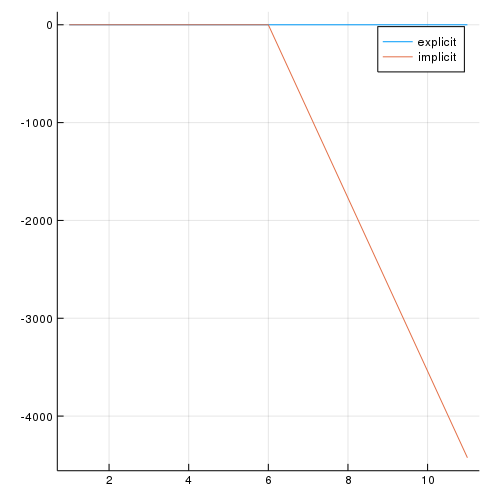

In [12]:
ts = cumsum([Δt for i in 1:N]);
j = 5
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")

In [ ]:
traj_imp

In [ ]:
maximum(traj_exp)